I have been interested in the Ooms plume model[@ooms-1972] for a long time, but I haven't really set aside the time to really play around with it because the implementation details surprisingly sparse. A recent weekend project of mine was to sit down and work out what the actual model equations are and get it running in julia. Something which might be useful to you if you are looking to run one of the O.G. integral plume models.

## The Ooms Plume Model

The Ooms plume model is a model of a continuous jet of fluid exiting into a crossflow. Unlike, for example, a simple Gaussian model which assumes the source has no momentum, or a free jet model which assumes there is no crossflow, the Ooms model accounts for the buoyancy and momentum of the jet as well as the crossflow without resorting empirical correlations (such as the Briggs' model).

However, unlike those simpler models, the Ooms model is not in the form of simple closed form expressions. It is an integral plume model which results in a system of differential algebraic equations which must be solved numerically for each particular plume. Unlike earlier integral plume models, which assumed a *top hat* velocity and density profile, the Ooms model assumes the plume parameters follow Gaussian profiles.

::: {#fig-plume-sketch}
![](./plume_sketch.png)

A sketch of the plume and the coordinate system.
:::

Consider the sketch of a vertical vent shown in @fig-plume-sketch. The plume starts at some point down stream of the actual vent, after the zone of flow establishment characterized by an elevation *&delta;*. The plume rises due to the buoyancy and momentum in the vent gases and bends over as it is carried along by the wind. The coordinate system is arranged such that the wind is in the positive x-direction and the center-line of the plume is within the x-z plane.

Taking a slice through the plume, we assume it has a circular cross-section and use a local cylindrical coordinate system with *s* the direction along the plume axis, *r* the radial direction, and *&phi;* the radial angle. The overall plume radius at any point is $\sqrt{2}b$, with *b* a characteristic length which is a function of distance along the center-line.

Zooming in on a differential element of the plume, @fig-diff-elem, we take it be approximately a cylinder where flow within the plume enters and exits through the circular ends and air is entrained through the outer surface with some entrainment velocity *E*.

::: {#fig-diff-elem}
![](plume_diff_elem.png)

A differential element of the plume along the plume center-line.
:::

The Ooms model comes from the conservation relations for this differential element.

### Conservation of...
#### Mass

The mass exiting the differential element is equal to the mass entering through the plume plus the entrained air.

$$ m_{out} = m_{in} + m_{ent} $$

The mass of entrained air is simply the product of the mass flux (*&rho;E*) and the area:

$$ m_{ent} = \rho_a E \cdot 2\pi \left( \sqrt{2} b \right) ds $$

Giving a mass balance equation:

$$ \frac{d}{ds} m = 2\pi \rho_a b \left( \sqrt{2} E \right) $$

The mass passing through a surface is simply the mass flux *G* = *&rho; u* integrated over the surface area:

$$ m = \int_{A_{in}} \rho u dA = \int_0^{2\pi} \int_0^{\sqrt{2}b} \rho u r dr d\phi $$
$$ m = 2\pi \int_{0}^{\sqrt{2}b} \rho u r dr $$

Finally giving

$$ 2\pi \frac{d}{ds} \int_{0}^{\sqrt{2}b} \rho u r dr = 2\pi \rho_a b \left( \sqrt{2} E \right) $$
$$ \frac{d}{ds} \int_{0}^{\sqrt{2}b} \rho u r dr = \rho_a b E $$

::: {.callout-note}
An errant $\sqrt{2}$ has disappeared from the right hand side of the equation. It has been absorbed into the constants in *E*. The right hand side of the balance equations in @ooms-1972 appear at first blush like they were done for a *top hat* model of a plume with radius *b*, which would be a mistake. However, as the overall radius of a plume in a top hat model *b*<sub>top-hat</sub> = $\sqrt{2}b_{gauss}$, when the constants are scaled by a factor of $\sqrt{2}$ the two look the same.
:::

#### Species

The total mass of the vented substance is conserved as the plume expands. Assuming the vent is some species *i* with mass concentration *c*:

$$ \frac{d}{ds} m_{i} = 0 $$
$$ m_i = \int_0^{2\pi} \int_0^{\sqrt{2}b} c u r dr d\phi = 2\pi \int_0^{\sqrt{2}b} c u r dr $$
$$ \frac{d}{ds} \int_0^{\sqrt{2}b} c u r dr = 0 $$

#### Momentum

There are two equations for conservation of momentum: in the x-direction and z-direction. This is a consequence of the choice of coordinates -- that the plume centerline is confined to the x-z plane and neither the jet nor the crossflow have velocity in the y-direction. In particular the coordinates were chosen such that the crossflow is entirely in the x-direction with velocity $u_a$.

In the x-direction the total momentum into the differential element is the mass in times the velocity component in the x direction:

$$ p_{x,in} = \int_{A_{in}} \rho_{in} u_{in} u_{x,in} dA = \int_{A_{in}} \rho_{in} u_{in}^2 \cos\theta_{in} dA $$

And similarly for the total momentum leaving the element

$$ p_{x,out} = \int_{A_{out}} \rho_{out} u_{out} u_{x,out} dA = \int_{A_{out}} \rho_{out} u_{out}^2 \cos\theta_{out} dA $$

The change in momentum is equal to the momentum added to the plume from entrainment and drag from the wind. In this case the drag force acts in the positive direction, pushing the plume along.

$$ p_{x,out} - p_{x,in} = m_{ent} u_a + F_{d,x} $$

Ooms notes that the drag force on the plume is only due to the component of the wind velocity which is perpendicular to the plume direction, $u_a \sin \theta$. Drag then follows the standard relationship, with the area being the outside surface area of the cylinder.

$$ F_{d} = \frac{1}{2} C_d A_{\perp} \rho_a v^2 = \frac{1}{2} C_d A_{\perp} \rho_a u_a^2 \sin^2 \theta $$

The drag force in the x-direction is acting on the area perpendicular to the x-direction

$$ F_{d,x} = \frac{1}{2} C_d \rho_a u_a^2 \sin^2 \theta 2\pi \left(\sqrt{2}b\right) | \sin \theta | ds = \pi b C_d \rho_a u_a^2 | \sin^3 \theta | ds$$

Where the absolute value comes from the drag force being always positive.

Giving

$$ 2 \frac{d}{ds} \int_{0}^{\sqrt{2}b} \rho u^2 \cos \theta r dr = 2 b \rho_a u_a E + \pi b C_d \rho_a u_a^2 | \sin^3 \theta | $$

In the z-direction the change in momentum is due to buoyant forces and drag in the z-direction. The buoyant force can be written as:

$$ F_b = \int_V g \left(\rho_a - \rho \right) dV = 2\pi ds \int_0^{\sqrt{2}b} g \left(\rho_a - \rho \right) rdr \cdot $$

Assuming the density within the differential element is approximately constant with *s*. Combining with the drag force in the z-direction gives the final momentum balance:

$$ 2 \frac{d}{ds} \int_{0}^{\sqrt{2}b} \rho u^2 \sin \theta r dr = 2 \int_0^{\sqrt{2}b} g \left(\rho_a - \rho \right) r dr + \mathrm{sgn}\theta \cdot \pi b C_d \rho_a u_a^2 \sin^2 \theta \cos \theta $$

Where $\mathrm{sgn} \theta$ ensures the drag force is acting in the right direction.

#### Energy

Starting from an energy balance, using the ambient temperature as the reference temperature, the enthalpy entering the differential element is:

$$ H_{in} = \int_{A_{in}} \rho u_{in} c_p \left( T - T_{a,0} \right) dA $$

Similarly for the enthalpy out, giving an enthalpy change over the element of:

$$ d \left( \int_{A} \rho u_{in} c_p \left( T - T_{a,0} \right) dA \right) = d \left( 2\pi \int_0^{\sqrt{2}b} \rho u c_p \left( T - T_{a,0} \right) r dr \right) $$

To be very abusive of notation. Where *T* is the temperature of the plume and *T*<sub>a,0</sub> is the reference temperature -- the ambient temperature at the vent exit. The enthalpy change is assumed to come only from entrainment. The enthalpy added to the differential element from entrainment of air is:

$$ \rho_a E c_{p,a} \left( T_a - T_{a,0} \right) \cdot 2\pi b ds  $$

Putting it all together we get the energy balance:

$$ \frac{d}{ds} \int_0^{\sqrt{2}b} \rho u c_p \left( T - T_{a,0} \right) r dr = b \rho_a E c_{p,a} \left( T_a - T_{a,0} \right) $$

Assuming the ideal gas law, we can make the substitution:

$$ T = {{ P {MW} } \over {R \rho}} $$

Furthermore, if we assume $MW = MW_a$ and $c_p = c_{p,a}$ then we can cancel all those constants giving:

$$ \frac{d}{ds} \int_0^{\sqrt{2}b} \rho u \left( \frac{1}{\rho} - \frac{1}{\rho_{a,0}} \right) r dr = b \rho_a E \left( \frac{1}{\rho_a} - \frac{1}{\rho_{a,0}} \right) $$

These seem like radical assumptions if you are coming to the Ooms plume model as a *dense gas* dispersion model, but the original paper is concerned with the release of stack gases from combustion equipment. For stack gases this is not unreasonable and other models such as the Briggs' model for plume rise make similar simplifications (any model that calculates buoyant flux from plume temperature alone is making that assumption implicitly).

### Coordinate Transforms

Up until this point all of the plume parameters have been calculated along the plume axis. This needs to be translated into the original coordinate system to be useful, in particular the curve the plume axis takes through space is given by:

$$ \frac{dx}{ds} = \cos \theta $$
$$ \frac{dz}{ds} = \sin \theta $$

### Entrainment

One of the most important parts of the model is how it accounts for entrainment. Ooms considers entrainment to be the sum of three processes.

In the immediate vicinity of the jet exit, when the jet velocity dominates, the entrainment is taken to be the same as a free jet, namely that it is proportional to the jet center line velocity. In this case we take the excess velocity:

$$ E_1 = \alpha_1 | u - u_a \cos \theta | $$

Where $u_a \cos \theta$ is the component of the wind velocity parallel to the jet. The parameter $\alpha_1$ is called the *entrainment coefficient for a free jet* and is independent of Reynolds' number when $\mathrm{Re} > 10^4$. Ooms gives this as $\alpha_1 = 0.057$.

At distances further down the plume axis, when $u \approx u_a$, the entrainment is taken to be the same as a cylindrical thermal in a stagnant atmosphere, given as:

$$ E_2 = \alpha_2 u_a | \sin \theta | $$

Where $\alpha_2$ is called the *entrainment coefficient for a line thermal*, it is similarly a constant at large Reynolds' numbers. Ooms gives this as $\alpha_2 = 0.5$

To connect these two regimes, Ooms multiplies the line thermal term by $\cos \theta$. This doesn't seem to have any theoretical justification, it just works to make the second term disappear when the vent is still mostly vertical. *This is an important feature to note*. The model is often presented such that the initial angle of the jet can be anything, but a key assumption of the entrainment model is that the jet is initially vertical.

Finally, Ooms adds a term to entrainment due to atmospheric turbulence. Presumably if you were only interested in jets entering a crossflow where that flow was nice and laminar you would leave this out. But Ooms is specifically developing his model for vent stacks releasing plumes into the atmosphere, and the actual structure of the atmosphere and its turbulence must be accounted for. He does this by including an entrainment velocity due to turbulence $u^{\prime}$

$$ E_3 = \alpha_3 u^{\prime} $$

Where $\alpha_3$ is the *entrainment coefficient due to turbulence*, which is taken to be $\alpha_1 = 1.0$. The entrainment velocity due to turbulence can be accounted for in one of two ways:

1. Following Briggs, $u^{\prime} = \sqrt[3]{\epsilon b}$ where $\epsilon$ is the eddy energy dissipation and is a function of atmospheric stability and elevation.
2. Empirically by the root-mean-square of the wind velocity fluctuation $u^{\prime} = \sqrt{u_a^2}$

The total entrainment is then:

$$ E = E_1 + E_2 \cos \theta + E_3 $$

$$ E = \alpha_1 | u - u_a \cos \theta | + \alpha_2 u_a | \sin \theta | \cos \theta + \alpha_3 u^{\prime} $$

or

$$ E = \alpha_1 | u^{*} | + \alpha_2 u_a | \sin \theta | \cos \theta + \alpha_3 u^{\prime} $$

Where $u^{*}$ is defined in the next section.

### Similarity Profiles

Earlier I mentioned that the velocity, density, and concentration in the plume are assumed to have Gaussian profiles. Though it doesn't really have a theoretical basis, Gaussian profiles are mathematically convenient and fit observed profiles quite well. This has been experimentally validated for both [free jets](/posts/turbulent_jet_notes/#empirical-velocity-profiles) and bent over plumes[@keffer-1963]. 

The velocity is taken to be the component of the wind velocity parallel to the plume axis plus an excess velocity:

$$ u = u_a \cos \theta + u^{*} \exp \left( - \left(r \over b\right)^2 \right) $$

The plume density, similarly, is the air density plus an excess density:

$$ \rho = \rho_a + \rho^{*} \exp \left( - \left(r \over {\lambda b} \right)^2 \right) $$

Finally, the concentration simply follows a Gaussian profile:

$$ c = c^{*} \exp \left( - \left(r \over {\lambda b} \right)^2 \right) $$

Where $\frac{1}{\lambda^2}$ is the [turbulent Schmidt number](https://en.wikipedia.org/wiki/Schmidt_number#Turbulent_Schmidt_Number). This is entirely analogous to [a free jet](https://aefarrell.github.io/posts/turbulent_jet_notes_part_2/#schmidt-number). I'm not sure entirely why Ooms gives the Schmidt number as what I would call the inverse of the Schmidt number, but that is just a quibble of notation.

Ooms uses a value of $\lambda^2 = 1.35$ or $\mathrm{Sc}_t = 0.741$, which is consistent with observations of free jets.

## Practical Necessities

The original paper does not provide the final differential algebraic equations, nor does it provide the worked out integrals, that is left as an exercise for the reader. I looked around and could not find a detailed description of the final model equations other than in the model documentation for DEGADIS[@havens-1988 pages 7-13]. An earlier version of DEGADIS used the Ooms plume model for dense gas plumes with modifications to the model assumptions and, especially, the energy balance. This is a good start, but it is presented in its final matrix form with 17 model constants that are pre-calculated. It is not immediately clear where the model constants come from and how they are related to the constant *&lambda;*.

::: {#fig-havens-constants}
![](havens_constants.png)

The model constants from Havens[@havens-1988 page 12], note the misprint in $k_{14}$ (should read 2.227186)
:::

The version in DEGADIS is intended for *dense gas dispersion* and makes additional assumptions such as that there is no vertical change in air density. This is a reasonable assumption for dense plumes that fall back to earth and roll along the ground, but is something that would have to be corrected for large buoyant plumes rising high into the air.

I did my own working out here because I wanted two things:

1. The relationship between the model constants (e.g *&lambda;*) and the integration constants (the k's in DEGADIS)
2. To re-create the model that allows for more structure to the atmosphere.

### A Series of Tedious Integrals

The integrals are not difficult to work out, though they can turn into a sort of alphabet soup of variables. The integrals involving Gaussians all involve something of the form $\int \exp(-ar^2) r dr$ which has a nice closed form solution.

I worked out five different constants that are integrals of the Gaussian profiles and the products of them:

$$ C_1 = 2 \int_0^{\sqrt{2}} \exp \left( - \xi^2 \right) \xi d\xi = 1 - \exp \left( -2 \right)$$
$$ C_2 = 2 \int_0^{\sqrt{2}} \exp \left( - \left( \frac{\xi}{\lambda} \right)^2 \right) \xi d\xi = \lambda^2 \left( 1 - \exp \left( -\frac{2}{\lambda^2} \right) \right)$$
$$ C_3 = 2 \int_0^{\sqrt{2}} \exp \left( - \xi^2 - \left( \frac{\xi}{\lambda} \right)^2 \right) \xi d\xi = \frac{\lambda^2}{\lambda^2 + 1} \left( 1 - \exp \left( -\frac{2 \left(\lambda^2 + 1\right)}{\lambda^2} \right) \right)$$
$$ C_4 = \int_0^{\sqrt{2}} \exp \left( - 2\xi^2 \right) \xi d\xi = \frac{1}{4} \left( 1 - \exp \left( -4 \right) \right)$$
$$ C_5 = \int_0^{\sqrt{2}} \exp \left( - 2\xi^2 - \left( \frac{\xi}{\lambda} \right)^2 \right) \xi d\xi = \frac{\lambda^2}{4\lambda^2 + 2} \left( 1 - \exp \left( -\frac{4\lambda^2 + 2}{\lambda^2} \right) \right)$$

These are basically in the order that I encountered them when working out the integrals and could probably be cleaned up for some consistency. Throughout I made the substitution $\xi = \frac{r}{b}$ such that every integral of a Gaussian in the model becomes $b^2 C$ where the *C* corresponds to one of the above. Each of the 17 constants in the DEGADIS model correspond to one of these constants times a scaling factor. For all but $k_1$ and $k_2$ they are integer scaling factors, for the first two they $\frac{1}{\lambda^2}$ times $C_2$ and $C_3$ respectively. Below is a table showing the concordance.

| DEGADIS[@havens-1988 page 12]  | Me                      |
|-------------------------------:|:------------------------|
| $k_{1 }$                       | $\frac{C_2}{\lambda^2}$ |
| $k_{2 }$                       | $\frac{C_3}{\lambda^2}$ |
| $k_{3 }$                       | $C_1$                   |
| $k_{4 }$                       | $C_2$                   |
| $k_{5 }$                       | $C_3$                   |
| $k_{6 }$                       | $2C_1$                  |
| $k_{7 }$                       | $2C_4$                  |
| $k_{8 }$                       | $2C_3$                  |
| $k_{9 }$                       | $2C_5$                  |
| $k_{10}$                       | $4C_4$                  |
| $k_{11}$                       | $4C_5$                  |
| $k_{12}$                       | $4C_1$                  |
| $k_{13}$                       | $3C_2$                  |
| $k_{14}$                       | $4C_3$                  |
| $k_{15}$                       | $\frac{C_2}{2}$         |
| $k_{16}$                       | $\frac{C_1}{2}$         |
| $k_{17}$                       | $\frac{C_3}{2}$         |

: Integration Constants {#tbl-consts tbl-colwidths="[25,25]"}

### Dimensionless Form

It is decidedly easier to put everything in dimensionless form first, using the following (where a bar over the variable indicates that it is dimensionless):

$$ \bar{s} = \frac{s}{D} $$
$$ \bar{c} = \frac{c^{*}}{c_0} $$
$$ \bar{b} = \frac{b}{D} $$
$$ \bar{u} = \frac{u^{*}}{u_a} $$
$$ \bar{\rho} = \frac{\rho^{*}}{\rho_a} $$
$$ \bar{x} = \frac{x}{D} $$
$$ \bar{z} = \frac{z}{D} $$

Where *D* is the initial jet diameter. This is the main point where what follows diverges from DEGADIS, where the model is given in dimension*al* form, which makes each of the expressions much larger and makes direct comparison between the two something of a chore.

### The Full Equations
#### Conservation of Mass

Thusly equipped, we can work out the integrals and subsequently all the derivatives. Starting with the conservation of mass:

$$ \int_0^{\sqrt{2}b} \rho u r dr = \int_0^{\sqrt{2}b} \rho_a u_a \left( 1 + \bar{\rho} \exp \left( - \left(r \over {\lambda b} \right)^2 \right) \right) \left( \cos \theta + \bar{u} \exp \left( - \left(r \over {b} \right)^2 \right) \right) r dr$$

$$ = \rho_a u_a b^2 \left( \cos \theta + \bar{\rho} \cos \theta \int_0^{\sqrt{2}} \exp \left( - \left(\xi \over {\lambda } \right)^2 \right) \xi d\xi + \bar{u} \int_0^{\sqrt{2}} \exp \left( - \xi^2 \right) \xi d\xi + \bar{\rho} \bar{u} \int_0^{\sqrt{2}} \exp \left( - \xi \left(\xi \over {\lambda } \right)^2 \right) \xi d\xi \right)$$
$$ = \frac{1}{2} \rho_a u_a D^2 \bar{b}^2 \left( \left( C_1 + C_3 \bar{\rho} \right) \bar{u} + \left(2 + C_2 \bar{\rho} \right) \cos \theta \right) $$

So the balance equation is:

$$ \frac{1}{2} \rho_a u_a \frac{d}{d\bar{s}} \bar{b}^2 \left( \left( C_1 + C_3 \bar{\rho} \right) \bar{u} + \left(2 + C_2 \bar{\rho} \right) \cos \theta \right) =  b \rho_a u_a \bar{E} $$
$$ \frac{d}{d\bar{s}} \bar{b}^2 \left( \left( C_1 + C_3 \bar{\rho} \right) \bar{u} + \left(2 + C_2 \bar{\rho} \right) \cos \theta \right) =  b \bar{E} $$

Where $\bar{E} = \frac{E}{u_a}$ is the dimensionless entrainment velocity.

Expanding out the derivatives and dividing through by *b*, we get:

$$ \left( 2\cos \theta  \left( 2 + C_2 \bar{\rho} \right) + 2 \bar{u} \left( C_1 + C_3\bar{\rho} \right) \right) \frac{d\bar{b}}{d\bar{s}} $$
$$ + \bar{b} \left( C_1 + C_3\bar{\rho} \right) \frac{d\bar{u}}{d\bar{s}} $$
$$ - \bar{b} \sin \theta \left( 2 + C_2\bar{\rho} \right) \frac{d\theta}{d\bar{s}} $$
$$ + \bar{b} \left( C_2\cos \theta + C_3\bar{u} \right) \frac{d\bar{\rho}}{d\bar{s}} = 2 \bar{E}$$

#### Conservation of Species

In the interests of not having this go on forever, I'm going to skip the details on the integral (they should be fairly obvious) and just give the balance equation and the final form with expanded out derivatives.

The balance equation is:

$$ \frac{d}{d\bar{s}} \left( \bar{c}\bar{b}^2 \left( C_2 \cos \theta + C_3 \bar{u} \right) \right) = 0 $$

The final form is:

$$ \bar{b} \left(C_3\bar{u} + C_2 \cos \theta \right) \frac{d\bar{c}}{d\bar{s}} $$
$$ + 2 \bar{c} \left(C_3\bar{u} + C_2 \cos \theta \right) \frac{d\bar{b}}{d\bar{s}} $$
$$ + C_3 \bar{c} \bar{b} \frac{d\bar{u}}{d\bar{s}} $$
$$ - C_2 \bar{c} \bar{b} \sin \theta \frac{d\theta}{d\bar{s}} = 0$$

#### Conservation of Momentum

The balance equation in the x-direction is:

$$ \frac{d}{d\bar{s}} \left[ \bar{b}^2 \cos \theta \left( 2\bar{u}^2 \left( C_4 + C_5\bar{\rho} \right) + 2\bar{u} \cos\theta \left(C_1 + C_3 \bar{\rho} \right) + \cos^2 \theta \left( 2 + C_2 \bar{\rho} \right) \right) \right] = \bar{b} \left( 2\bar{E} + C_d | \sin^3 \theta | \right) $$

The final form is:

$$ 2\cos\theta \left[ 2\bar{u}^2 \left( C_4 + C_5 \bar{\rho} \right) + 2\bar{u} \cos\theta \left(C_1 + C_3 \bar{\rho} \right) + \cos^2 \theta \left( 2 + C_2 \bar{\rho} \right) \right] \frac{d\bar{b}}{d\bar{s}} $$
$$ + 2\bar{b} \cos\theta \left[ 2\bar{u} \left( C_4 + C_5\bar{\rho} \right) +  \cos\theta \left(C_1 + C_3 \bar{\rho} \right) \right] \frac{d\bar{u}}{d\bar{s}} $$
$$ - \bar{b} \sin\theta \left[ 2\bar{u}^2 \left( C_4 + C_5 \bar{\rho} \right) + \cos \theta \left( 4\bar{u} \left(C_1 + C_3 \bar{\rho} \right) + 3\cos \theta \left( 2 + C_2 \bar{\rho} \right) \right) \right] \frac{d\theta}{d\bar{s}} $$
$$ + \bar{b} \cos\theta \left[ C_2 \cos^2 \theta + 2C_3 \bar{u} \cos \theta + 2 C_5 \bar{u}^2 \right] \frac{d\bar{\rho}}{d\bar{s}} = 2 \bar{E} + C_d | \sin^3 \theta |$$

The balance equation in the z-direction is:

$$ \frac{d}{d\bar{s}} \left[ \bar{b}^2 \sin \theta \left( 2\bar{u}^2 \left( C_4 + C_5\bar{\rho} \right) + 2\bar{u} \cos\theta \left(C_1 + C_3 \bar{\rho} \right) + \cos^2 \theta \left( 2 + C_2 \bar{\rho} \right) \right) \right] = -C_2 \bar{b}^2 \bar{\rho} \bar{g} + \mathrm{sgn}\theta \cdot C_d \bar{b} \sin^2 \theta \cos \theta$$

Where $\bar{g} = \frac{Dg}{u_a^2}$ is the dimensionless gravity.

The final form is:

$$ 2\sin\theta \left[ 2\bar{u}^2 \left( C_4 + C_5 \bar{\rho} \right) + 2\bar{u} \cos\theta \left(C_1 + C_3 \bar{\rho} \right) + \cos^2 \theta \left( 2 + C_2 \bar{\rho} \right) \right] \frac{d\bar{b}}{d\bar{s}} $$
$$ + 2\bar{b} \sin\theta \left[ 2\bar{u} \left( C_4 + C_5\bar{\rho} \right) +  \cos\theta \left(C_1 + C_3 \bar{\rho} \right) \right] \frac{d\bar{u}}{d\bar{s}} $$
$$ + \bar{b} \left[ 2\bar{u}^2 \cos\theta \left(C_4 + C_5 \bar{\rho} \right) + 2\bar{u} \left(\cos^2 \theta - \sin^2 \theta \right) \left( C_1 - C_3 \bar{\rho} \right) + \left(1 - 3\sin^2 \theta \right)\cos\theta \left(2 + C_2 \bar{\rho} \right) \right] \frac{d\theta}{d\bar{s}} $$
$$ + \bar{b} \sin\theta \left[ C_2 \cos^2 \theta + 2C_3 \bar{u} \cos \theta + 2 C_5 \bar{u}^2 \right] \frac{d\bar{\rho}}{d\bar{s}} = -C_2 \bar{b} \bar{\rho} \bar{g} + \mathrm{sgn}\theta \cdot C_d \sin^2 \theta \cos \theta$$

#### Conservation of Energy

The balance equation is:

$$ \frac{d}{d\bar{s}} \left[ \bar{b}^2 \left( 2\cos\theta + C_1 \bar{u} - \bar{\rho_a} \left( \bar{u} \left(C_1 + C_3 \bar{\rho} \right) + \cos \theta \left( 2 + C_2\bar{\rho} \right) \right) \right)\right] = 2\bar{b} \left( 1 - \bar{\rho_a} \right) \bar{E}$$

Where $\bar{\rho_a} = \frac{\rho_a}{\rho_{a,0}}$ is the dimensionless air density.

The final form is:

$$ 2\left( 2\cos\theta + C_1 \bar{u} - \bar{\rho_a} \left( \bar{u} \left(C_1 + C_3 \bar{\rho} \right) + \cos \theta \left( 2 + C_2\bar{\rho} \right) \right)\right) \frac{d\bar{b}}{d\bar{s}} $$
$$ + b\left( C_1 - \bar{\rho_a} \left(C_1 + C_3 \bar{\rho} \right) \right) \frac{d\bar{u}}{d\bar{s}} $$
$$ -b\sin\theta \left( 2 - \bar{\rho_a} \left( 2 + C_2\bar{\rho} \right) \right) \frac{d\theta}{d\bar{s}} $$
$$ - \bar{b} \bar{\rho_a} \left( C_3 \bar{u} + C_2 \cos \theta \right) \frac{d\bar{\rho}}{d\bar{s}} = 2 \left( 1 - \bar{\rho_a} \right) \bar{E}$$

## Implementing the Ooms Plume Model

Implementing this in julia is very straightforward, starting with the model constants

In [1]:
#| output: false
# constants from Ooms 1972
const λ² = 1.35
const α₁ = 0.057
const α₂ = 0.5
const α₃ = 1.0
const ϵ  = 0.0
const Cd = 0.3

0.3

In [2]:
#| output: false
# integration constants
const C₁ = 1-exp(-2)
const C₂ = λ²*(1-exp(-2/λ²))
const C₃ = (λ²/(λ²+1))*(1-exp(-2*(λ²+1)/λ²))
const C₄ = (1-exp(-4))/4
const C₅ = (λ²/(4λ²+2))*(1-exp(-(4λ²+2)/λ²))

0.18167293748560673

In [3]:
#| output: false
# physical constants
const g   = 9.80665   # standard gravity, m/s²
const MWₐ = 0.0289652 # molar weight dry air, kg/mol
const cpₐ = 1.006     # specific heat dry air, kJ/kg/K
const ρₐ₀ = 1.2250 	  # standard density dry air, kg/m³

1.225

The standard way of writing a differential algebraic equation is in the form of a mass matrix, *M*:

$$ M \frac{d}{d\bar{s}} \mathrm{state} = f\left(\mathrm{state}, s\right) $$

Where `state` is the state vector for this system. In this case *M* is not a constant, it is a function of the state of the system as well. Below is a function that calculates the mass matrix for a given state of the system, this is done *in place* to reduce the number of allocations required. The state variables are all in dimensionless form -- the overbars are implied.

In [4]:
#| output: false
function ooms_matrix!(M,state,p,s)
	# unpack variables for readability
	c, b, u, θ, ρ, x, z = state

	# calculate atmospheric conditons at centerline elevation	
	ρₐ_bar = p.rhoa_bar(z)

	# species balance
	M[1,1] = b*( C₃*u + C₂*cos(θ) )
	M[1,2] = 2*c*( C₃*u + C₂*cos(θ) )
	M[1,3] = C₃*c*b
	M[1,4] = -C₂*c*b*sin(θ)
	M[1,5] = 0
	M[1,6] = 0
	M[1,7] = 0

	# overall mass balance
	M[2,1] = 0
	M[2,2] = 2cos(θ)*(2 + C₂*ρ) + 2u*(C₁ + C₃*ρ)
	M[2,3] = b*(C₁ + C₃*ρ)
	M[2,4] = -b*sin(θ)*(2 + C₂*ρ)
	M[2,5] = b*(C₂*cos(θ) + C₃*u)
	M[2,6] = 0
	M[2,7] = 0

	# x momentum balance
	M[3,1] = 0
	M[3,2] = 2cos(θ)*( 2u^2*(C₄ + C₅*ρ) + 2u*cos(θ)*(C₁ + C₃*ρ) 
		               + cos(θ)^2*(2 + C₂*ρ))
	M[3,3] = 2b*cos(θ)*( cos(θ)*(C₁ + C₃*ρ) + 2u*(C₄ + C₅*ρ) )
	M[3,4] = -b*sin(θ)*( cos(θ)*( 4u*(C₁ + C₃*ρ) + 3cos(θ)*(2 + C₂*ρ) )
		               + 2u^2*(C₄ + C₅*ρ) )
	M[3,5] = b*cos(θ)*( C₂*cos(θ)^2 + 2C₃*u*cos(θ) + 2C₅*u^2 )
	M[3,6] = 0
	M[3,7] = 0

	# z momentum balance
	M[4,1] = 0
	M[4,2] = 2sin(θ)*( 2u*cos(θ)*(C₁ + C₃*ρ) + cos(θ)^2*(2 + C₂*ρ) 
					  + 2u^2*(C₄ + C₅*ρ))
	M[4,3] = 2b*sin(θ)*(cos(θ)*(C₁ + C₃*ρ) +2u*(C₄ + C₅*ρ))
	M[4,4] = b*(2u*(cos(θ)^2 - sin(θ)^2)*(C₁ + C₃*ρ) 
		        + (1-3sin(θ)^2)*cos(θ)*(2 + C₂*ρ) 
		        + 2u^2*cos(θ)*(C₄ + C₅*ρ))
	M[4,5] = b*sin(θ)*(C₂*cos(θ)^2 + 2C₃*u*cos(θ) + 2C₅*u^2)
	M[4,6] = 0
	M[4,7] = 0

	# energy balance
	M[5,1] = 0
	M[5,2] = 2(2cos(θ) + C₁*u - ρₐ_bar*(u*(C₁ + C₃*ρ) + cos(θ)*(2 + C₂*ρ)) )
	M[5,3] = b*( C₁ - ρₐ_bar*(C₁ + C₃*ρ) )
	M[5,4] = -b*sin(θ)*( 2 - ρₐ_bar*(2 + C₂*ρ) )
	M[5,5] = -b*ρₐ_bar*( C₂*cos(θ) + C₃*u )
	M[5,6] = 0
	M[5,7] = 0

	# x coordinate
	M[6,1:5] .= 0
	M[6,6] = 1
	M[6,7] = 0

	# z coordinate
	M[7,1:6] .= 0
	M[7,7] = 1
end

ooms_matrix! (generic function with 1 method)

In dimensionless form, the only parameter of the system that is relevant to the mass matrix is $\bar{\rho_a}$ which is a function of the (dimensionless) elevation.

The right-hand-side of the system of equations is below, and is also in place. In this case there are three parameters: $\bar{\rho_a}$, $\bar{g}$ and $\bar{u^{\prime}} = \frac{u^{\prime}}{u_a}$. These are all functions of elevation, the latter two because $u_a$ is a function of elevation.

In [5]:
#| output: false
function ooms_rhs!(f,state,p,s)
	# unpack variables for readability
	c, b, u, θ, ρ, x, z = state

	# calculate atmospheric conditons at centerline elevation
	ρₐ_bar = p.rhoa_bar(z)
	g_bar = p.g_bar(z)
	
	# entrainment
	u′ = p.uprime_bar(b, z)
	E  = α₁*abs(u) + α₂*abs(sin(θ))*cos(θ) + α₃*u′
	sgn = θ<0 ? -1 : +1

	f .= [ 0                     # species balance
		   2E                    # overall mass balance
		   2E + Cd*abs(sin(θ)^3) # x momentum balance
		   -C₂*b*ρ*g_bar + sign(θ)*Cd*sin(θ)^2*cos(θ) # z momentum balance
		   2*(1-ρₐ_bar)*E       # energy balance
		   cos(θ)                # x coordinate
		   sin(θ)]               # z coordinate
end

ooms_rhs! (generic function with 1 method)

### ... as an ODE

The most direct way of implementing the model is as an ODE where

$$ \frac{d}{d\bar{s}} \mathrm{state} = M^{-1} f $$

Though instead of taking the matrix inverse a linear solve is done. This is what you might call the conventional approach, or traditional approach perhaps. People who spend a lot of time with DAEs and numerical computation will tell you not to do this -- it can be unstable and fail if *M* is singular or near-singular -- but it is also throughout the literature, especially in older code. For example, this is how DEGADIS implements the right-hand-side of the ODE.

In [6]:
using OrdinaryDiffEq

In [7]:
#| output: false
function ode_rhs!(dstate,state,p,s)
	ooms_matrix!(p.M,state,p,s)
	ooms_rhs!(p.f,state,p,s)
	dstate[:] = p.M\p.f
end

ode_rhs! (generic function with 1 method)

Instead of allocating (and garbage collecting) a matrix *M* and vector *f* every time the right-and-side is called, I pre-allocate them and store them with the model parameters as a kind of scratch space.

For a working example, suppose the vent is releasing into a neutral atmosphere with no density gradient and a windspeed at the stack height of 2m/s

In [8]:
#| output: false
const dρₐdz = 0.0
const uₐ₀   = 2.0     # m/s

2.0

The vent itself is basically air but hotter and thus at a lower density. The vent stack is 2m from the ground and 20cm in diameter, the vent is being ejected at 10m/s vertically. I am also ignoring the zone of flow establishment and having the plume start exactly at the vent exit.

In [9]:
#| output: false
const MWⱼ = MWₐ       # kg/m³
const cpⱼ = cpₐ       # kJ/kg/K
const ρⱼ  = ρₐ₀/2     # kg/m³
const D   = 0.2       # m
const u₀  = 10.0      # m/s
const h   = 2.0       # m
const θ₀  = π/2
const c₀  = ρⱼ

0.6125

The system parameters are simply the scratch space for *M* and *f*, and the three dimensionless groups which are each functions of elevation. In this case I am further assuming that windspeed is uniform.

In [10]:
#| output: false
params = (M = zeros(7,7),
	      f = zeros(7),
		  rhoa_bar = (z) -> 1.0 + (dρₐdz/ρₐ₀)*D*z,
		  g_bar = (z) -> (g*D)/uₐ₀^2,
		  uprime_bar = (b, z) -> ∛(ϵ*b*D)/uₐ₀)

(M = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], f = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], rhoa_bar = var"#1#4"(), g_bar = var"#2#5"(), uprime_bar = var"#3#6"())

The initial state, in dimensionless form, is then

In [11]:
#| output: false
state0 = [ 1.0             ,# c
	       1/(2√(2))       ,# b
	       u₀/uₐ₀          ,# u
	       θ₀              ,# θ
           (ρⱼ - ρₐ₀)/ρₐ₀  ,# ρ
	       0.0             ,# x
           h/D             ]# z

7-element Vector{Float64}:
  1.0
  0.35355339059327373
  5.0
  1.5707963267948966
 -0.5
  0.0
 10.0

::: {.callout-note}
The initial value for $\bar{b}_{0}$ might seem strange and arbitrary, but this comes from matching the initial dimensions of the plume to the exit of the vent stack. Recall the plume radius is $\sqrt{2}{b}$ so, if the plume initially has a radius equal to the vent $\sqrt{2}b_0 = \frac{D}{2}$ and $\bar{b}_0 = \frac{b}{D} = \frac{1}{2\sqrt{2}}$
:::

Integrating out 100 stack diameters along the plume

In [12]:
#| output: false
span = (0.0, 100)
prob = ODEProblem(ode_rhs!, state0, span, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 100.0)
u0: 7-element Vector{Float64}:
  1.0
  0.35355339059327373
  5.0
  1.5707963267948966
 -0.5
  0.0
 10.0

In [13]:
sol = solve(prob, Tsit5())

sol.retcode

ReturnCode.Success = 1

In [14]:
#| echo: false
using CairoMakie

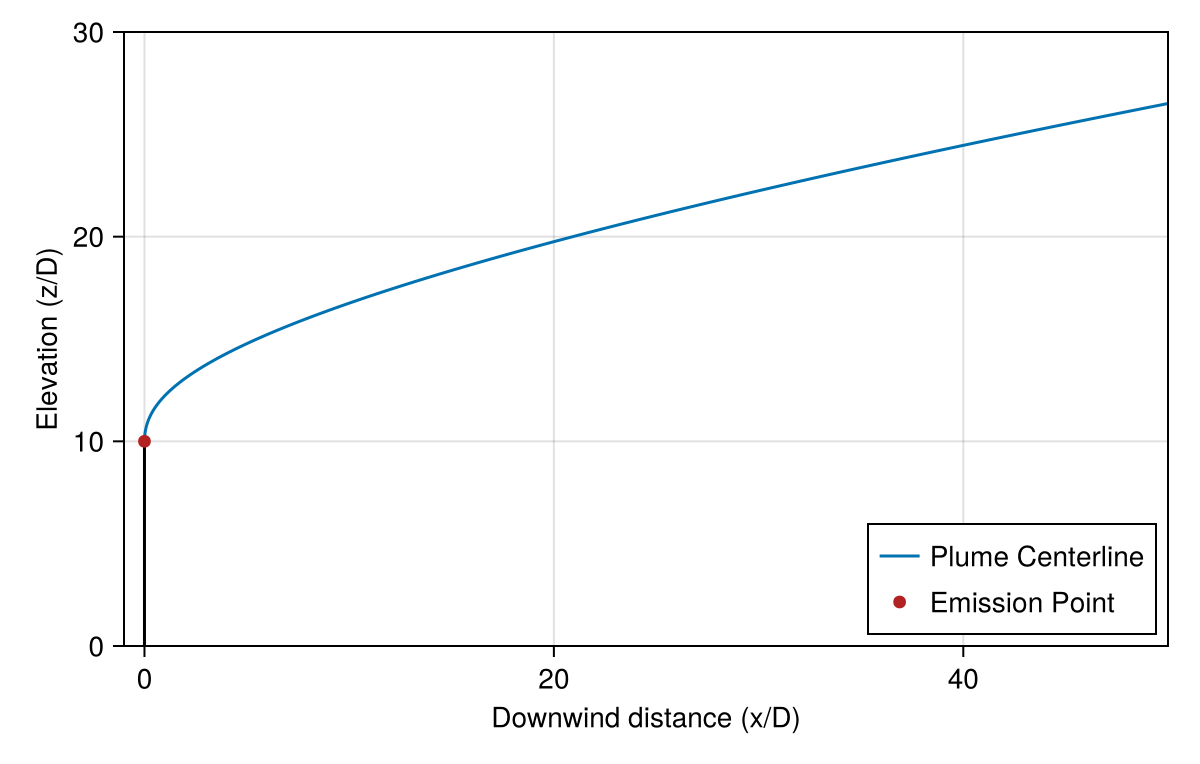

In [15]:
#| echo: false
#| label: fig-ode-1
#| fig-cap: "The plume height as a function of downwind distance."
f1 = Figure(figurepadding=0)
ax1 = Axis(f1[1, 1],
    xlabel = "Downwind distance (x/D)",
    ylabel = "Elevation (z/D)",
    limits = ((-1,50),(0,30)),
    aspect = DataAspect()
)
plot!(ax1, sol, idxs=(6,7), label="Plume Centerline")
lines!(ax1, [0, 0], [0, h/D], color=:black, label=nothing)
scatter!(ax1, [0], [h/D], color=:firebrick, label="Emission Point")
axislegend(position=:rb)
rowsize!(f1.layout,1,Aspect(1, 30/51))
resize_to_layout!(f1)
f1

### ... as a DAE

Nesting the linear solve step within the right-hand-side of the ODE can be dangerous if *M* ever becomes singular, or close to it. It is probably safer to use a DAE solver instead.

DAE solvers expect to be solving a differential algebraic equation of the form:

$$ f\left( \mathrm{state}^{\prime}, \mathrm{state}, s \right) = 0$$

Using the matrix and rhs functions defined earlier this easy enough to do, in this case the function is in-place.

In [16]:
#| output: false
function dae_lhs!(resid,dstate,state,p,s)
	ooms_matrix!(p.M,state,p,s)
	ooms_rhs!(p.f,state,p,s)
	resid[:] = p.M*dstate - p.f
end

dae_lhs! (generic function with 1 method)

The DAE solver also needs an initial state for all of the derivatives, which can be calculated by solving the linear system for the derivatives given the initial conditions.

In [17]:
#| output: false
M0 = zeros(7,7)
ooms_matrix!(M0,state0,params,0)

f0 = zeros(7)
ooms_rhs!(f0,state0,params,0)

dstate0 = M0\f0

7-element Vector{Float64}:
 -0.3449200462659969
  0.15244074222549434
 -3.1835275074132707
 -0.3183669337990177
  0.17246002313299844
  6.123233995736766e-17
  1.0

In [18]:
#| output: false
diff_vars = fill(true, 7)
daeprob = DAEProblem(dae_lhs!, dstate0, state0, span, params; 
					 differential_vars = diff_vars)

DAEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 7-element Vector{Float64}:
  1.0
  0.35355339059327373
  5.0
  1.5707963267948966
 -0.5
  0.0
 10.0
du0: 7-element Vector{Float64}:
 -0.3449200462659969
  0.15244074222549434
 -3.1835275074132707
 -0.3183669337990177
  0.17246002313299844
  6.123233995736766e-17
  1.0

The `DAEProblem` also needs a hint as to which are differential equations, this is what is being passed by the `differential_vars` keyword argument. In this case they are all differential equations so I pass a vector of seven `true`s.

The DAE solver I am going to use is `IDA` from [Sundials](https://github.com/SciML/Sundials.jl).

In [19]:
using Sundials

In [20]:
daesol = solve(daeprob, IDA())

daesol.retcode

ReturnCode.Success = 1

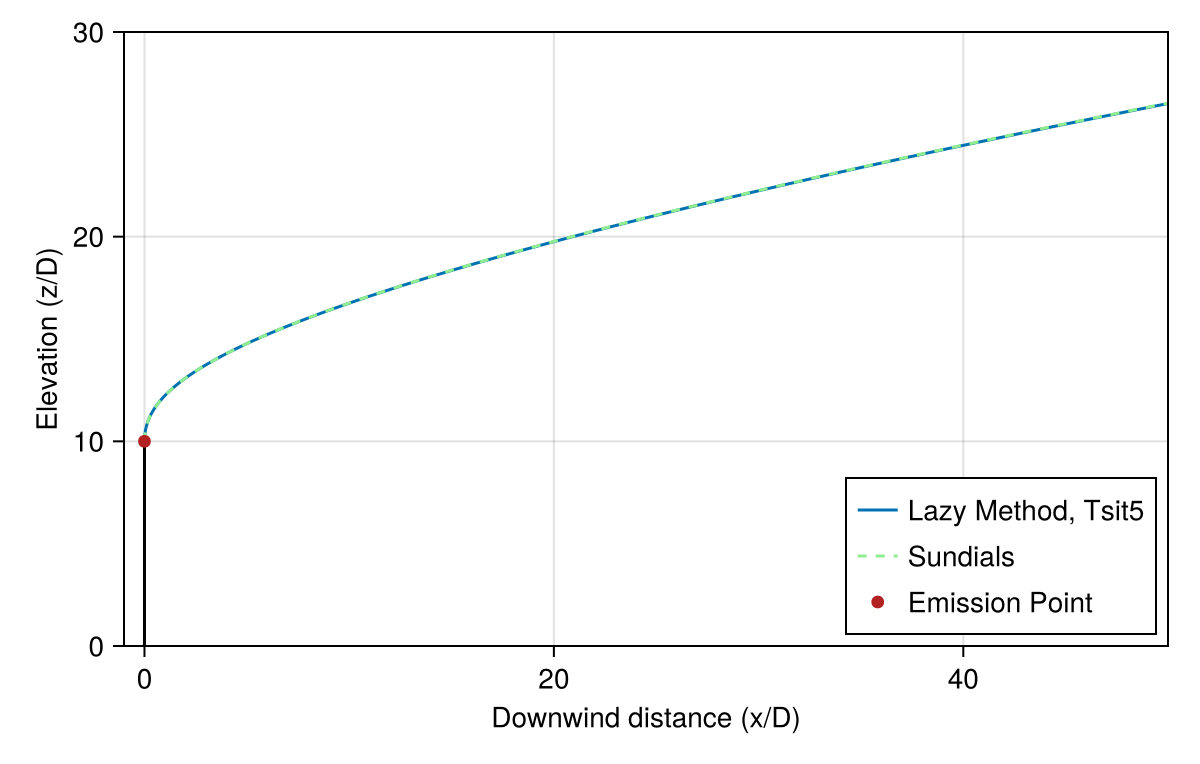

In [21]:
#| echo: false
#| label: fig-dae-1
#| fig-cap: "The plume height as a function of downwind distance, solutions using the DifferentialEquations.jl solver Tsit5 and the Sundials DAE solver IDA."
f2 = Figure(figurepadding=0)
ax2 = Axis(f2[1, 1],
    xlabel = "Downwind distance (x/D)",
    ylabel = "Elevation (z/D)",
    limits = ((-1,50),(0,30)),
    aspect = DataAspect()
)
plot!(ax2, sol, idxs=(6,7), label="Lazy Method, Tsit5")
plot!(ax2, daesol, idxs=(6,7), color=:lightgreen, linestyle=:dash, label="Sundials")
lines!(ax2, [0, 0], [0, h/D], color=:black, label=nothing)
scatter!(ax2, [0], [h/D], color=:firebrick, label="Emission Point")
axislegend(position=:rb)
rowsize!(f2.layout,1,Aspect(1, 30/51))
resize_to_layout!(f2)
f2

This works as well as the lazy method, slightly slower but it has not been implemented in a particularly optimal way.

### ... using ModelingToolkit
If you know anything about the universe of tools in julia for modelling differential algebraic equations you are probably yelling at your screen *"use ModelingToolkit!"*. In terms of getting a DAE from nothing to a working model it is by far the easiest way to do it. I deliberately put all of the working out in this blog post because it annoys me that it is so hard to find online and I want it to be somewhere. But if I didn't care about that, ModelingToolkit is the obvious choice.

In [22]:
using ModelingToolkit, Symbolics
using ModelingToolkit: t_nounits as s, D_nounits as ∂

# I would use D for derivative but I'm already using 
# that for jet diameter so I'm using ∂ instead

First I define the system variables, again these are in dimensionless form.

In [23]:
vars = @variables c(s) b(s) u(s) θ(s) ρ(s) x(s) z(s)

7-element Vector{Num}:
 c(t)
 b(t)
 u(t)
 θ(t)
 ρ(t)
 x(t)
 z(t)

If this wasn't in a notebook that includes other methods of solving the DAE, I would have declared the model constants using the `@constants` macro. It makes the formulas look nicer for one, e.g. instead of numbers like `0.86466` there would be the appropriate constant $C_1$.

In [24]:
# conservation of mass
∫ρurdr = b^2*( (C₁ + C₃*ρ)*u + (2 + C₂*ρ)*cos(θ) )

E = α₁*abs(u) + α₂*abs(sin(θ))*cos(θ) + α₃*∛(ϵ*b*D)/uₐ₀

eqn1 = expand_derivatives( ∂( ∫ρurdr ) ) ~ 2*b*E

2(u(t)*(0.8646647167633873 + 0.5567964103445843ρ(t)) + (2 + 1.0431440589840777ρ(t))*cos(θ(t)))*Differential(t)(b(t))*b(t) + (0.5567964103445843u(t)*Differential(t)(ρ(t)) + (0.8646647167633873 + 0.5567964103445843ρ(t))*Differential(t)(u(t)) + 1.0431440589840777Differential(t)(ρ(t))*cos(θ(t)) - sin(θ(t))*(2 + 1.0431440589840777ρ(t))*Differential(t)(θ(t)))*(b(t)^2) ~ 2(0.057abs(u(t)) + 0.5abs(sin(θ(t)))*cos(θ(t)))*b(t)

In [25]:
# conservation of species
∫curdr = c*b^2*(C₂*cos(θ) + C₃*u)

eqn2 = expand_derivatives( ∂( ∫curdr ) ) ~ 0

2(0.5567964103445843u(t) + 1.0431440589840777cos(θ(t)))*c(t)*Differential(t)(b(t))*b(t) + (0.5567964103445843u(t) + 1.0431440589840777cos(θ(t)))*Differential(t)(c(t))*(b(t)^2) + (0.5567964103445843Differential(t)(u(t)) - 1.0431440589840777sin(θ(t))*Differential(t)(θ(t)))*c(t)*(b(t)^2) ~ 0

In [26]:
# conservation of momentum
# x-direction
∫ρu²cosθrdr = b^2*cos(θ)*(2u*cos(θ)*(C₁ + C₃*ρ) + 2u^2*(C₄ + C₅*ρ) 
                          + cos(θ)^2*(2 + C₂*ρ))

eqn3 = expand_derivatives( ∂( ∫ρu²cosθrdr ) ) ~ 
         b*( 2E + Cd*abs(sin(θ)^3) )

2(2(u(t)^2)*(0.24542109027781644 + 0.18167293748560673ρ(t)) + 2u(t)*(0.8646647167633873 + 0.5567964103445843ρ(t))*cos(θ(t)) + (2 + 1.0431440589840777ρ(t))*(cos(θ(t))^2))*Differential(t)(b(t))*cos(θ(t))*b(t) - (2(u(t)^2)*(0.24542109027781644 + 0.18167293748560673ρ(t)) + 2u(t)*(0.8646647167633873 + 0.5567964103445843ρ(t))*cos(θ(t)) + (2 + 1.0431440589840777ρ(t))*(cos(θ(t))^2))*sin(θ(t))*(b(t)^2)*Differential(t)(θ(t)) + (0.36334587497121346(u(t)^2)*Differential(t)(ρ(t)) + 4u(t)*(0.24542109027781644 + 0.18167293748560673ρ(t))*Differential(t)(u(t)) + 1.1135928206891685u(t)*Differential(t)(ρ(t))*cos(θ(t)) + 2(0.8646647167633873 + 0.5567964103445843ρ(t))*Differential(t)(u(t))*cos(θ(t)) + 1.0431440589840777Differential(t)(ρ(t))*(cos(θ(t))^2) - 2u(t)*sin(θ(t))*(0.8646647167633873 + 0.5567964103445843ρ(t))*Differential(t)(θ(t)) - 2sin(θ(t))*(2 + 1.0431440589840777ρ(t))*cos(θ(t))*Differential(t)(θ(t)))*cos(θ(t))*(b(t)^2) ~ (0.3abs(sin(θ(t))^3) + 2(0.057abs(u(t)) + 0.5abs(sin(θ(t)))*cos(θ(t))))*b(

In [27]:
# z-direction
∫ρu²sinθrdr = b^2*sin(θ)*(2u*cos(θ)*(C₁ + C₃*ρ) + 2u^2*(C₄ + C₅*ρ) 
                          + cos(θ)^2*(2 + C₂*ρ))

eqn4 = expand_derivatives( ∂( ∫ρu²sinθrdr ) ) ~ 
	     -C₂*b^2*ρ*(g*D/uₐ₀^2) + sign(θ)*Cd*b*sin(θ)^2*cos(θ)

2(2(u(t)^2)*(0.24542109027781644 + 0.18167293748560673ρ(t)) + 2u(t)*(0.8646647167633873 + 0.5567964103445843ρ(t))*cos(θ(t)) + (2 + 1.0431440589840777ρ(t))*(cos(θ(t))^2))*sin(θ(t))*Differential(t)(b(t))*b(t) + (2(u(t)^2)*(0.24542109027781644 + 0.18167293748560673ρ(t)) + 2u(t)*(0.8646647167633873 + 0.5567964103445843ρ(t))*cos(θ(t)) + (2 + 1.0431440589840777ρ(t))*(cos(θ(t))^2))*cos(θ(t))*(b(t)^2)*Differential(t)(θ(t)) + (0.36334587497121346(u(t)^2)*Differential(t)(ρ(t)) + 4u(t)*(0.24542109027781644 + 0.18167293748560673ρ(t))*Differential(t)(u(t)) + 1.1135928206891685u(t)*Differential(t)(ρ(t))*cos(θ(t)) + 2(0.8646647167633873 + 0.5567964103445843ρ(t))*Differential(t)(u(t))*cos(θ(t)) + 1.0431440589840777Differential(t)(ρ(t))*(cos(θ(t))^2) - 2u(t)*sin(θ(t))*(0.8646647167633873 + 0.5567964103445843ρ(t))*Differential(t)(θ(t)) - 2sin(θ(t))*(2 + 1.0431440589840777ρ(t))*cos(θ(t))*Differential(t)(θ(t)))*sin(θ(t))*(b(t)^2) ~ -0.5114874343018103ρ(t)*(b(t)^2) + 0.3(sin(θ(t))^2)*cos(θ(t))*b(t)*sign(θ(

In [28]:
# energy balance
ρₐ_bar = 1 + dρₐdz*D*z/ρₐ₀

∫ρucₚΔTrdr = b^2*(2cos(θ) + C₁*u - ρₐ_bar*( u*(C₁ + C₃*ρ) 
                  + cos(θ)*(2 + C₂*ρ) ))

eqn5 = expand_derivatives( ∂( ∫ρucₚΔTrdr ) ) ~ 2*b*(1 - ρₐ_bar)*E

2(0.8646647167633873u(t) + 2cos(θ(t)) - u(t)*(0.8646647167633873 + 0.5567964103445843ρ(t)) - (2 + 1.0431440589840777ρ(t))*cos(θ(t)))*Differential(t)(b(t))*b(t) + (0.8646647167633873Differential(t)(u(t)) - 0.5567964103445843u(t)*Differential(t)(ρ(t)) - 2sin(θ(t))*Differential(t)(θ(t)) + (-0.8646647167633873 - 0.5567964103445843ρ(t))*Differential(t)(u(t)) - 1.0431440589840777Differential(t)(ρ(t))*cos(θ(t)) - sin(θ(t))*(-2 - 1.0431440589840777ρ(t))*Differential(t)(θ(t)))*(b(t)^2) ~ 0.0

In [29]:
#| output: false
# The full system of equations

eqns = [ eqn1
	     eqn2
	     eqn3
	     eqn4
	     eqn5
	     ∂(x) ~ cos(θ)
	     ∂(z) ~ sin(θ) ]

7-element Vector{Equation}:
 2(u(t)*(0.8646647167633873 + 0.5567964103445843ρ(t)) + (2 + 1.0431440589840777ρ(t))*cos(θ(t)))*Differential(t)(b(t))*b(t) + (0.5567964103445843u(t)*Differential(t)(ρ(t)) + (0.8646647167633873 + 0.5567964103445843ρ(t))*Differential(t)(u(t)) + 1.0431440589840777Differential(t)(ρ(t))*cos(θ(t)) - sin(θ(t))*(2 + 1.0431440589840777ρ(t))*Differential(t)(θ(t)))*(b(t)^2) ~ 2(0.057abs(u(t)) + 0.5abs(sin(θ(t)))*cos(θ(t)))*b(t)
 2(0.5567964103445843u(t) + 1.0431440589840777cos(θ(t)))*c(t)*Differential(t)(b(t))*b(t) + (0.5567964103445843u(t) + 1.0431440589840777cos(θ(t)))*Differential(t)(c(t))*(b(t)^2) + (0.5567964103445843Differential(t)(u(t)) - 1.0431440589840777sin(θ(t))*Differential(t)(θ(t)))*c(t)*(b(t)^2) ~ 0
 2(2(u(t)^2)*(0.24542109027781644 + 0.18167293748560673ρ(t)) + 2u(t)*(0.8646647167633873 + 0.5567964103445843ρ(t))*cos(θ(t)) + (2 + 1.0431440589840777ρ(t))*(cos(θ(t))^2))*Differential(t)(b(t))*cos(θ(t))*b(t) - (2(u(t)^2)*(0.24542109027781644 + 0.18167293748560

[Symbolics.jl](https://docs.sciml.ai/Symbolics/stable/) has done all the derivatives and set up all the equations, what remains is to build `ODESystem` and solve.

In [30]:
@named sys = ODESystem(eqns, s)
sys = structural_simplify(sys)

Model sys:
Equations (12):
  12 standard: see equations(sys)
Unknowns (12): see unknowns(sys)
  b(t)
  ρ(t)
  θ(t)
  u(t)
  bˍt(t)
  ρˍt(t)
  ⋮

In this case there are no model parameters as I inserted the equations for the dimensionless groups directly into the model.

In [31]:
#| output: false
mtk_params = ()

()

The initial values simply map over the initial state I worked out previously. Because ModelingToolkit generates its own internal structure and shuffles things around, a mapping needs to be provided for the initial conditions.

In [32]:
#| output: false
initial_vals = [ c => state0[1],
                 b => state0[2],
                 u => state0[3],
                 θ => state0[4],
                 ρ => state0[5],
                 x => state0[6],
                 z => state0[7] ]

7-element Vector{Pair{Num, Float64}}:
 c(t) => 1.0
 b(t) => 0.35355339059327373
 u(t) => 5.0
 θ(t) => 1.5707963267948966
 ρ(t) => -0.5
 x(t) => 0.0
 z(t) => 10.0

In [33]:
#| output: false
mtk_prob = ODEProblem(sys, initial_vals, span)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: true
timespan: (0.0, 100.0)
u0: 12-element Vector{Float64}:
  0.35355339059327373
 -0.5
  1.5707963267948966
  5.0
  0.0
  0.0
  0.0
  0.0
  1.0
  0.0
 10.0
  0.0

In [34]:
mtk_sol = solve(mtk_prob, Rodas5P())

mtk_sol.retcode

ReturnCode.Success = 1

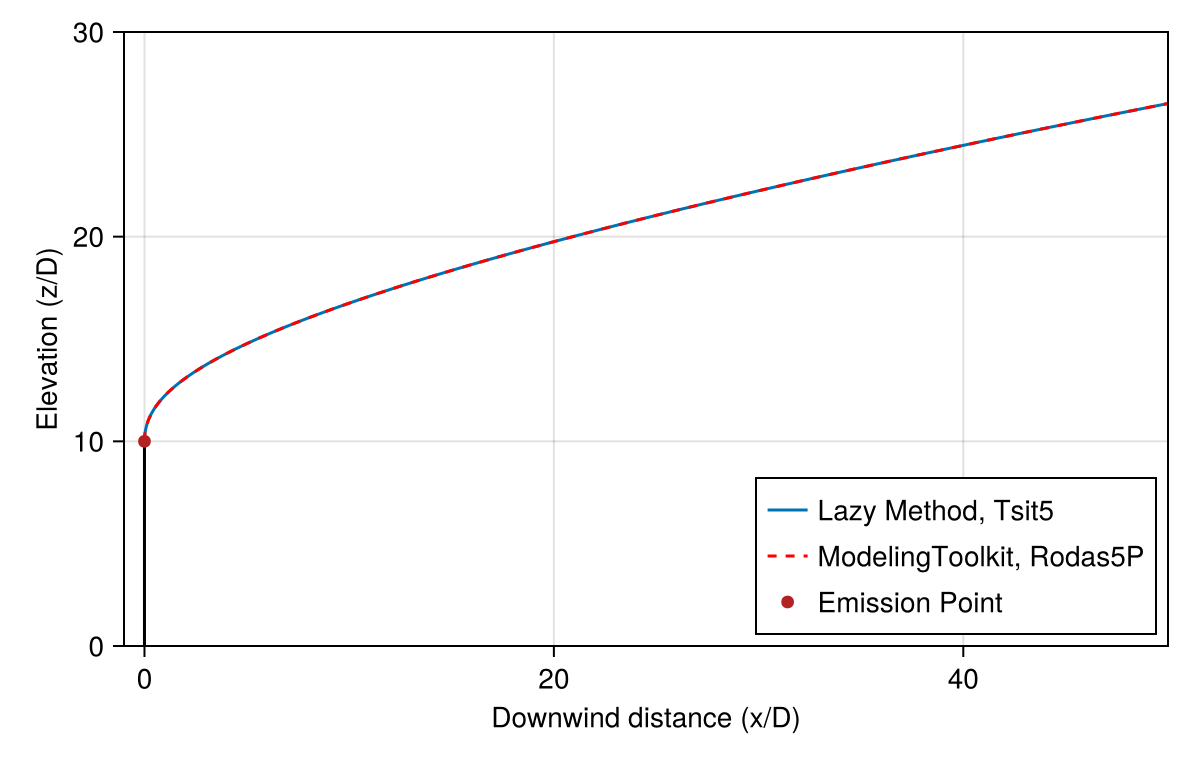

In [35]:
#| echo: false
#| label: fig-mtk-dae-1
#| fig-cap: "The plume height as a function of downwind distance, solutions using the lazy approach with the Tsit5 solver and ModelingToolkit using Rodas5P."
f3 = Figure(figurepadding=0)
ax3 = Axis(f3[1, 1],
    xlabel = "Downwind distance (x/D)",
    ylabel = "Elevation (z/D)",
    limits = ((-1,50),(0,30)),
    aspect = DataAspect()
)
plot!(ax3, sol, idxs=(6,7), label="Lazy Method, Tsit5")
plot!(ax3, mtk_sol, idxs=(x,z), color=:red, linestyle=:dash, label="ModelingToolkit, Rodas5P")
lines!(ax3, [0, 0], [0, h/D], color=:black, label=nothing)
scatter!(ax3, [0], [h/D], color=:firebrick, label="Emission Point")
axislegend(position=:rb)
rowsize!(f3.layout,1,Aspect(1, 30/51))
resize_to_layout!(f3)
f3

In terms of julia code that needed to be written, and calculus that needed to be done, this the simplest by far. Simply compare to the enormous mass matrix expression above to convince yourself of that. There are also code generation tools that can be used if you want to extract the model either as a julia script or even C code. Furthermore, if you want to go through term by term and look at the coefficients for each derivative, Symbolics.jl can do that too. I actually used Symbolics to check all of my work in the mass matrix.

### Dead Ends and Failures

Another approach to the ODE problem is to use a matrix operator. This is a mass matrix problem with a state dependent mass matrix, which is one of the use cases for [SciMLOperators.jl](https://docs.sciml.ai/SciMLOperators/stable/#Why-SciMLOperators?)

In [36]:
using SciMLOperators

In [37]:
#| output: false
M = MatrixOperator(zeros(7,7); update_func! = ooms_matrix!)

MatrixOperator(7 × 7)

In [38]:
#| output: false
massprob = ODEProblem(ODEFunction(ooms_rhs!, mass_matrix=M), state0, span, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: true
timespan: (0.0, 100.0)
u0: 7-element Vector{Float64}:
  1.0
  0.35355339059327373
  5.0
  1.5707963267948966
 -0.5
  0.0
 10.0

In [39]:
mass_sol = solve(massprob,Rodas5P(); initializealg=BrownFullBasicInit())

mass_sol.retcode

┌ Warning: At t=0.0, dt was forced below floating point epsilon 5.0e-324, and step error estimate = NaN. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/rvXrA/src/integrator_interface.jl:623


ReturnCode.Unstable = 7

I tried a bunch of different solvers and initialization algorithms, nothing could get past the first timestep. That there are two working versions of this system, in this post, using the same exact mass matrix function leads me to suspect it is not a model error, or that the solution is unstable. There is probably some aspect to how I'm supposed to be initializing this problem, or some other feature of using matrix operators, that I'm doing wrong, but I find the documentation on that to be mostly absent. I know these *can work* because I have used this exact method on simpler systems in the past.

If I ever figure out what I need to do to make this work, or more definitively why it doesn't, I'll come back and update this. Consider this an invitation to tell me all the ways I'm doing this wrong in the comments.

## The Problem of Concentration

The plume solution is fundamentally in terms of the plume axis. It is not immediately obvious how to calculate the concentrations at particular points in space relative to the problem coordinate system. The way I see it, there are three related problems that involve calculating concentrations from the Ooms model.

1. Calculating the isopleths in the x-z plane
2. Calculating the isopleths at an arbitrary elevation $z=a$
3. Calculating the concentration at an arbitrary point $x,y,z$

These all stem from the problem that for some arbitrary point not on the plume axis, it is not immediately clear which part of the plume axis is governing the concentration there. This is because the concentration profiles are not perpendicular to the x-axis, they are perpendicular to the s-axis and that curves through space.

### Isopleths in the x-z Plane

The easiest problem to solve is the isopleths in the plane $y=0$. Suppose we want to calculate the isopleth for some concentration $c = c_l$. Recalling the concentration profile:

$$ \bar{c}_l = \bar{c}_o \exp \left( - \left( \frac{r}{\lambda b} \right)^2 \right) $$

Where $\bar{c}_o$ is the center line concentration at that point along the plume axis. We first solve for $r$, the distance from the plume axis:

$$ r = b \lambda \sqrt{ \log \left( \bar{c}_o \over \bar{c}_l \right) } $$

Converting from cylindrical coordinates to Cartesian coordinates, $x^{\prime}, y^{\prime}, z^{\prime}$, aligned such that $x^{\prime}$ is aligned with the plume axis, the radius is

$$ r^2 = \left(y^{\prime}\right)^2 + \left(z^{\prime}\right)^2 $$

Since we are confined to the plane $y^{\prime} = 0$, we find $z^{\prime} = \pm r$. Then we rotate the axis to align with the problem coordinate system and translate the origin to the problem origin.

$$ x = x_o \mp r \sin \theta $$
$$ z = z_o \pm r \cos \theta $$

Where $x_o$ and $z_o$ is the location of the particular point on the plume axis we were looking at. The *origin* relative to the point on the plume axis, hence the subscript *o*. The positive *r* gives the upper isopleth and the negative *r* gives the lower isopleth.

::: {.callout-note}
Casal[@casal-2018 page 306] provides an alternative form of these isopleths:

$$ z = z_o \pm \sqrt{ { {\lambda^2 b^2} \over { 1 + \tan^2 \theta }} \log \left(\frac{c_o}{c_l} \right) } $$

and 

$$ {{z - z_o} \over {x - x_o}} = -\cot \theta $$

These are actually equivalent, using the identity $\sec^2 = 1 + \tan^2 \theta$ and the definition $\sec \theta = \frac{1}{\cos \theta}$, the first equation can be written as:

$$ z = z_o \pm \sqrt{ { {\lambda^2 b^2} \over { \sec^2 \theta }} \log \left(\frac{c_o}{c_l} \right) } = z_o \pm \sqrt{ \lambda^2 b^2 \cos^2 \theta \log \left(\frac{c_o}{c_l} \right) } = z_o \pm \lambda b \sqrt{ \log \left(\frac{c_o}{c_l} \right) } \cos \theta = z_o \pm r \cos \theta$$

The second equation can be re-written to solve for *x*:

$$ {{z - z_o} \over {x - x_o}} = -\cot \theta $$
$$ {z - z_o}  = -\left(x - x_o\right)\cot \theta $$
$$ \pm r \cos \theta = -\left(x - x_o\right)\cot \theta $$
$$ \pm r \cos \theta = - \left(x - x_o\right) \frac{\cos \theta}{\sin \theta}$$
$$ x = x_o \mp r \sin \theta $$
:::

In [40]:
#| output: false
function upper_isopleth(solution, s, c)
    cₒ, bₒ, uₒ, θₒ, ρₒ, xₒ, zₒ = solution(s)

    if c ≈ cₒ
        return Point(xₒ,zₒ)
    elseif c > cₒ
        return nothing
    else
        r = bₒ * √(λ²*log(cₒ/c))
        x = xₒ - r*sin(θₒ)
        z = zₒ + r*cos(θₒ)
        return Point(x,z)
    end
end

upper_isopleth (generic function with 1 method)

In [41]:
#| output: false
function lower_isopleth(solution, s, c)
    cₒ, bₒ, uₒ, θₒ, ρₒ, xₒ, zₒ = solution(s)

    if c ≈ cₒ
        return Point(xₒ,zₒ)
    elseif c > cₒ
        return nothing
    else
        r = bₒ * √(λ²*log(cₒ/c))
        x = xₒ + r*sin(θₒ)
        z = zₒ - r*cos(θₒ)
        return Point(x,z)
    end
end

lower_isopleth (generic function with 1 method)

For an example, suppose we want the isopleth for $c/c_0 = 2\%$

In [42]:
#| output: false
cₗ = 0.02 # c/c₀ = 2%

0.02

First, I find the point along the plume axis where the concentration drops below 2%, there is no point in looking for an isopleth past this point since it doesn't exist.

In [43]:
using Roots: find_zero

In [44]:
i_end = findfirst(sol[1,:] .< cₗ )

20

In [45]:
s_end = find_zero( (s) -> sol(s, idxs = 1) - cₗ, sol.t[i_end])

46.23790952011145

Then I can calculate a series of points for the upper isopleth and the lower isopleth from the origin out to where the plume concentration has dropped below 2%.

In [46]:
upper_points = [ upper_isopleth(sol, s, cₗ) for s in LinRange(0.0, s_end, 100) 
                 if !isnothing(upper_isopleth(sol, s, cₗ))];
lower_points = [ lower_isopleth(sol, s, cₗ) for s in LinRange(0.0, s_end, 100) 
                 if !isnothing(lower_isopleth(sol, s, cₗ))];

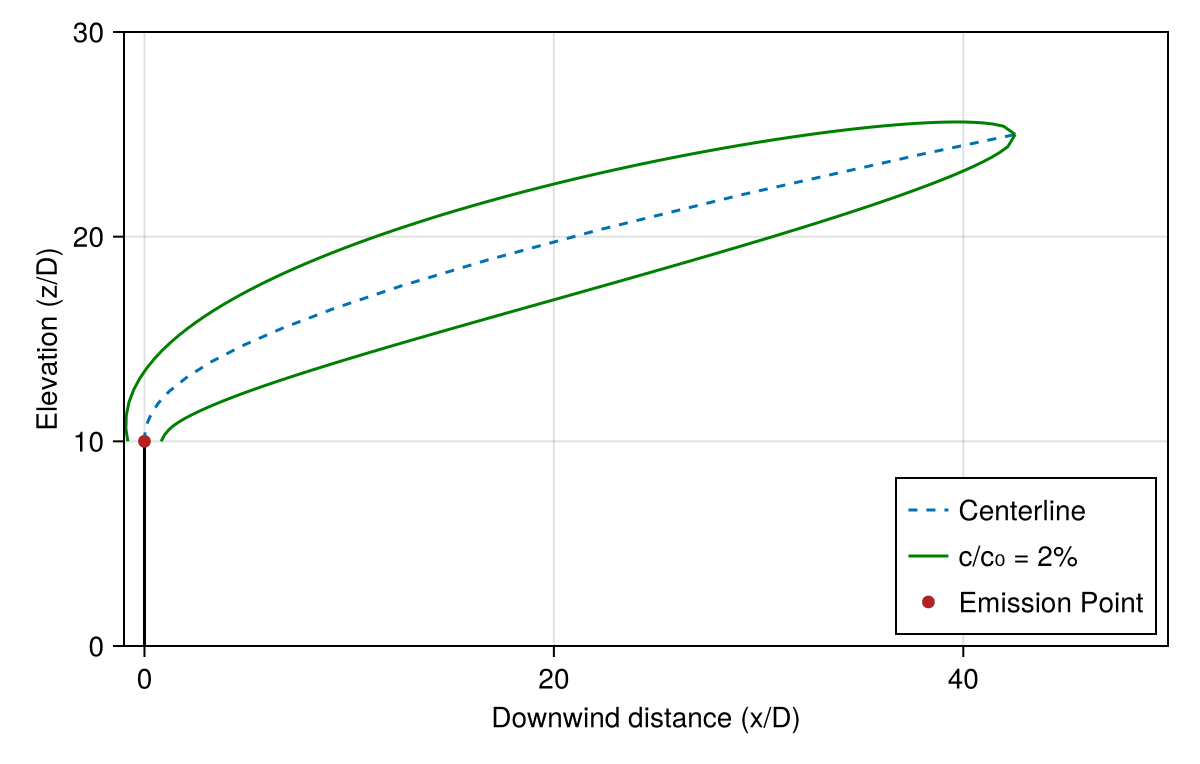

In [47]:
#| echo: false
#| label: fig-isopleths
#| fig-cap: "Plume vertical isopleths, 2%(vol)"

x_cl = vcat(sol[6, 1:i_end-1], [sol(s_end, idxs = 6)])
z_cl = vcat(sol[7, 1:i_end-1], [sol(s_end, idxs = 7)])

f5 = Figure(figurepadding=0)
ax5 = Axis(f5[1, 1],
    xlabel = "Downwind distance (x/D)",
    ylabel = "Elevation (z/D)",
    limits = ((-1,50),(0,30)),
    aspect = DataAspect()
)
lines!(ax5, x_cl, z_cl, linestyle=:dash, label="Centerline")
lines!(ax5, upper_points, color=:green, label="c/c₀ = 2%")
lines!(ax5, lower_points, color=:green, label=nothing)
lines!(ax5, [0, 0], [0, h/D], color=:black, label=nothing)
scatter!(ax5, [0], [h/D], color=:firebrick, label="Emission Point")
axislegend(position=:rb)
rowsize!(f5.layout,1,Aspect(1, 30/51))
resize_to_layout!(f5)
f5

### Isopleths at *z=a*

A somewhat more difficult problem is finding the isopleths on the plane *z=a*. The logic is the same: for each point along the plume axis, work out the distance *r* to the given concentration, then solve for *y* given *z=a*.

In [48]:
#| output: false
function cross_isopleth(solution, s, c, a)
    cₒ, bₒ, uₒ, θₒ, ρₒ, xₒ, zₒ = solution(s)

    if c ≈ cₒ
        return Point(xₒ,0.0)
    elseif c > cₒ
        # isopleth doesn't exist here
        return nothing
    else
        # find the x coordinate
        xₒ′ = xₒ*cos(θₒ) + zₒ*sin(θₒ)
        x   = (xₒ′ - a*sin(θₒ))*sec(θₒ)
        
        # find the y coordinate
        r²  = bₒ^2 * λ²*log(cₒ/c)
        z′² = ((a - zₒ)*cos(θₒ) - (x - xₒ)*sin(θₒ))^2

        if z′² > r²
            # the isosurface doesn't intersect z=a
            return nothing
        else
            y′ = √( r² - z′²)
            y = y′
            return Point(x,y)
        end
    end
end

cross_isopleth (generic function with 1 method)

Picking an arbitraty height of 20 stack diameters in elevation.

In [49]:
#| output: false
a = 20 # 20 stack diameters

20

We need to find the start and end of the isopleth, which not immediately obvious like it was of the isopleths in the plane *y=0*. But we can re-use the vertical isopleths -- the start of the isopleth is the point where the upper isopleth intersects *z=a* and the end is where the lower isopleth intersects it. I have used the word isopleth a lot, hopefully it makes sense and has not lost all meaning.

In [51]:
# the start of the isopleth
s_start = find_zero( (s) -> upper_isopleth(sol, s, cₗ)[2] - a, 14)

14.87383455152286

In [53]:
# the end of the isopleth
s_end = find_zero( (s) -> lower_isopleth(sol, s, cₗ)[2] - a, 33)

33.55677883331305

In [55]:
#| output: false
cross_points = [ cross_isopleth(sol, s, cₗ, a) for s in LinRange(s_start+1e-3, s_end, 100) 
                 if !isnothing(cross_isopleth(sol, s, cₗ, a))]

100-element Vector{Point{2, Float64}}:
 [11.283710815850062, 0.04377770872105974]
 [11.486489902603047, 0.5983627670577253]
 [11.688961920489591, 0.8386312631857129]
 [11.89113819708426, 1.018785263582035]
 [12.09303001151504, 1.1670889695882478]
 [12.294647535666725, 1.2946118395434971]
 [12.496000443332697, 1.407083279846098]
 [12.697097979870406, 1.5079356849614283]
 [12.897948980143747, 1.5994233884861582]
 [13.098561885918201, 1.6831241981774756]
 [13.298944762736538, 1.7601952284124411]
 [13.499105316301598, 1.8315159949282889]
 [13.699050908390886, 1.8977742024721014]
 ⋮
 [28.555883838741728, 1.6198749825653942]
 [28.748909861951923, 1.5514145118847584]
 [28.94189968442521, 1.478315708906989]
 [29.13485389683752, 1.3998616817324445]
 [29.327773080890033, 1.3151045618153392]
 [29.520657810061138, 1.2227453486152562]
 [29.71350862833639, 1.1209174417304535]
 [29.90632596389059, 1.0067577807087906]
 [30.099110324653978, 0.8754681632009274]
 [30.291862224131673, 0.7177254004275612]


In [56]:
#| output: false
flipped_points = [ Point( pt[1], -1*pt[2] ) for pt in cross_points ]

100-element Vector{Point{2, Float64}}:
 [11.283710815850062, -0.04377770872105974]
 [11.486489902603047, -0.5983627670577253]
 [11.688961920489591, -0.8386312631857129]
 [11.89113819708426, -1.018785263582035]
 [12.09303001151504, -1.1670889695882478]
 [12.294647535666725, -1.2946118395434971]
 [12.496000443332697, -1.407083279846098]
 [12.697097979870406, -1.5079356849614283]
 [12.897948980143747, -1.5994233884861582]
 [13.098561885918201, -1.6831241981774756]
 [13.298944762736538, -1.7601952284124411]
 [13.499105316301598, -1.8315159949282889]
 [13.699050908390886, -1.8977742024721014]
 ⋮
 [28.555883838741728, -1.6198749825653942]
 [28.748909861951923, -1.5514145118847584]
 [28.94189968442521, -1.478315708906989]
 [29.13485389683752, -1.3998616817324445]
 [29.327773080890033, -1.3151045618153392]
 [29.520657810061138, -1.2227453486152562]
 [29.71350862833639, -1.1209174417304535]
 [29.90632596389059, -1.0067577807087906]
 [30.099110324653978, -0.8754681632009274]
 [30.291862224131673

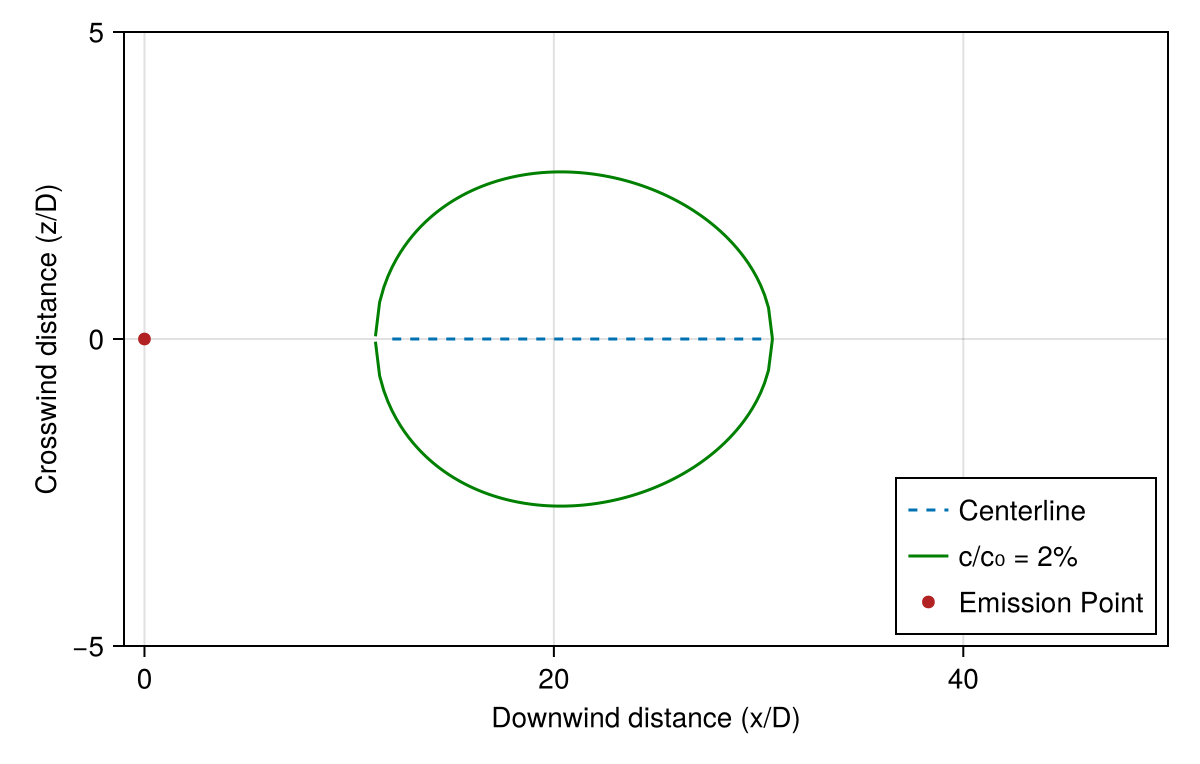

In [57]:
#| echo: false
#| label: fig-cross-isopleths
#| fig-cap: "Plume crosswind isopleths at z/D = 20, 2%(vol)"

x_cl = [sol(14.875, idxs = 6), sol(33.55, idxs = 6)]
y_cl = similar(x_cl) .* 0

f7 = Figure(figurepadding=0)
ax7 = Axis(f7[1, 1],
    xlabel = "Downwind distance (x/D)",
    ylabel = "Crosswind distance (z/D)",
    limits = ((-1,50),(-5,5))
)
lines!(ax7, x_cl, y_cl, linestyle=:dash, label="Centerline")
lines!(ax7, cross_points, color=:green, label="c/c₀ = 2%")
lines!(ax7, flipped_points, color=:green, label=nothing)
scatter!(ax7, [0], [0], color=:firebrick, label="Emission Point")
axislegend(position=:rb)
rowsize!(f7.layout,1,Aspect(1, 30/51))
resize_to_layout!(f7)
f7

### The Concentration at an Arbitrary Point

Calculating the concentration at some arbitrary point involves first backing out where along the plume axis the concentration is coming from, then calculating the concentration using the Gaussian profile.

To find the location on the axis that governs the concentration at the point, i.e. the location on the axis where a vector connecting it to the arbitrary point is perpendicular to the plume axis, I basically just rotate the problem coordinate system to align with the plume axis and check. Since the ODE solution includes a set of pre-calculated points, I use it to generate an initial guess of where to look and then use Newton's method to find the exact location *s*.

In [58]:
#| output: false
function find_centerline(solution,x,y,z)
    function perp_test(s)
        θₒ, _, xₒ, zₒ = solution(s, idxs=4:7)
        x′ = x*cos(θₒ) + z*sin(θₒ)
        xₒ′ = xₒ*cos(θₒ) + zₒ*sin(θₒ)
        return x′ - xₒ′
    end

    # find initial guess
    i0 = argmin( [ abs(perp_test(s)) for s in sol.t ] )
    s0 = sol.t[i0]

    # find the zero point
    return find_zero(perp_test, s0)
end

find_centerline (generic function with 1 method)

The concentration then builds on this by first finding the location along the plume axis that connects to the arbitrary point, calculating the distance *r* from the plume axis to the point, and finally returning the concentration.

In [59]:
#| output: false
function concentration(solution,x,y,z)
    # get the point on the centerline that governs this point
    sₒ = find_centerline(solution,x,y,z)
    cₒ, bₒ, uₒ, θₒ, ρₒ, xₒ, zₒ = sol(sₒ)

    # rotate the coordinate system to the plume axis
    y′ = y
    z′ = (z - zₒ)*cos(θₒ) - (x - xₒ)*sin(θₒ)
    r² = (y′)^2 + (z′)^2

    # calculate concentration
    c = cₒ*exp(-r²/(bₒ^2*λ²))

    return c
end

concentration (generic function with 1 method)

How do I know this is actually working? I don't really have test data to compare against. But I do have some isopleths that I calculated independently (though using the same trig), I can check that the concentration at those points is indeed what it is supposed to be (2%).

In [61]:
#| output: false
upper_concentrations = [ concentration(sol, pt[1], 0, pt[2]) for pt in upper_points ]
lower_concentrations = [ concentration(sol, pt[1], 0, pt[2]) for pt in lower_points ]
cross_concentrations = [ concentration(sol, pt[1], pt[2], a) for pt in cross_points ]

100-element Vector{Float64}:
 0.02000000000000002
 0.020000000000000007
 0.02
 0.019999999999999993
 0.019999999999999945
 0.02000000000000003
 0.019999999999999966
 0.020000000000000014
 0.020000000000000014
 0.02
 0.02
 0.019999999999999997
 0.019999999999999993
 ⋮
 0.01999999999999999
 0.02
 0.019999999999999997
 0.02000000000000001
 0.01999999999999998
 0.02000000000000001
 0.019999999999999997
 0.02
 0.02
 0.02
 0.019999999999999987
 0.020000000000000018

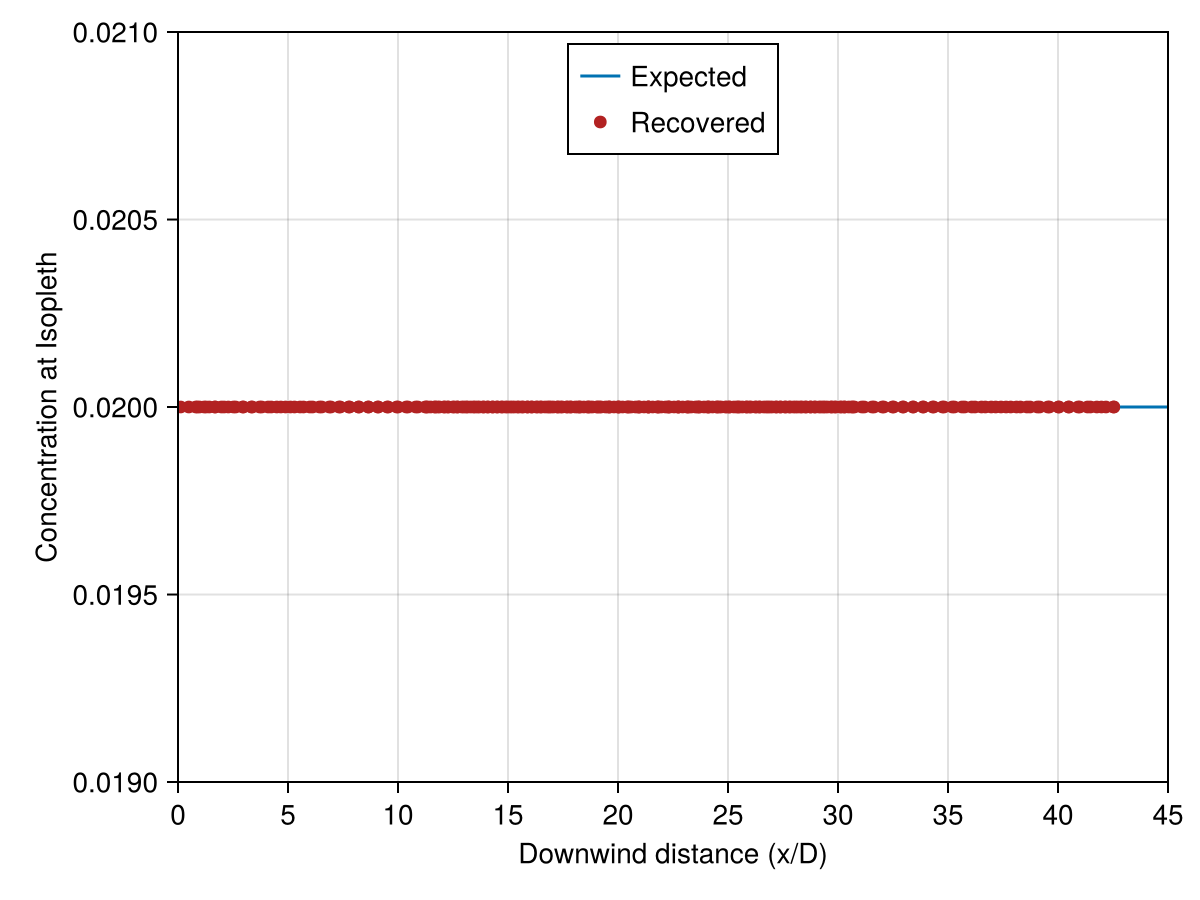

In [64]:
#| echo: false
#| label: fig-concentrations
#| fig-cap: "A scatterplot showing how well the concentration function recovered the concentration at the points on the isopleths"

f6 = Figure()
ax6 = Axis(f6[1, 1],
    xlabel = "Downwind distance (x/D)",
    ylabel = "Concentration at Isopleth",
    limits = ((0,45),(0.019,0.021)),
)
lines!(ax6, [0,50], [0.02,0.02], linestyle=:solid, label="Expected")
scatter!(ax6, [pt[1] for pt in upper_points], upper_concentrations, color=:firebrick, label="Recovered")
scatter!(ax6, [pt[1] for pt in lower_points], lower_concentrations, color=:firebrick, label=nothing)
scatter!(ax6, [pt[1] for pt in cross_points], cross_concentrations, color=:firebrick, label=nothing)
axislegend(position=:ct)
f6

Indeed it does recover the concentrations as expected. There is one massive caveat though, it is assuming that there is only *one* location on the plume axis where a line connecting the point to the plume is perpendicular to the plume axis. If the plume is strongly curving, such as when a dense plume is emitted and bends back down to earth, this is no longer true. I think the basic assumptions of the plume itself start to break down once the plume bends back and intersects itself. I don't think there really is a "correct" answer for how to calculate the concentration there.

## Capturing Dense Gas Behaviour

The plume model only assumes that the vent gas has a similar molar weight and heat capacity to air. It is still possible to have a negatively buoyant plume, this would be equivalent to a vent of cryogenic gas. In this case the plume will crash to the ground and...continue going. There is nothing in the Ooms model that requires *z* to be positive. If we assume the initial condition is $\bar{z}_0 = \frac{h+\delta}{D}$ where *h* is the height of the vent stack, we can use a simple callback function to trigger once the integrator has crossed the ground plane and reflect the plume back.

### Bouncing Plume with a Standard Callback

In [48]:
#| output: false
ground_check(state, s, i) = state[7] # z

ground_check (generic function with 1 method)

In [49]:
#| output: false
function reflect_plume!(integrator)
	# bounce off the ground
	integrator.u[4] = abs(integrator.u[4]) # θ
	integrator.u[7] = 0                    # z
end

reflect_plume! (generic function with 1 method)

In [50]:
#| output: false
ground_cb = ContinuousCallback(ground_check, reflect_plume!)

ContinuousCallback{typeof(ground_check), typeof(reflect_plume!), typeof(reflect_plume!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Nothing, Int64}(Main.ground_check, Main.reflect_plume!, Main.reflect_plume!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, nothing, SciMLBase.LeftRootFind, 10, Bool[1, 1], 1, 2.220446049250313e-15, 0, 1//100, nothing)

This makes the plume bounce along the ground. An alternative, and what DEGADIS does, is to terminate the integration once the plume contacts the ground and transition to another model.

In [51]:
#| output: false
dense_state0 = [ 1.0             ,# c
	             1/(2√(2))       ,# b
	             u₀/uₐ₀          ,# u
	             θ₀              ,# θ
                 10.0            ,# ρ
	             0.0             ,# x
                 h/D             ]# z

7-element Vector{Float64}:
  1.0
  0.35355339059327373
  5.0
  1.5707963267948966
 10.0
  0.0
 10.0

In [52]:
#| output: false
dense_prob =  ODEProblem(ode_rhs!, dense_state0, span.*2, params)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 200.0)
u0: 7-element Vector{Float64}:
  1.0
  0.35355339059327373
  5.0
  1.5707963267948966
 10.0
  0.0
 10.0

In [53]:
dense_sol = solve(dense_prob, Tsit5(); callback=ground_cb)

dense_sol.retcode

ReturnCode.Success = 1

### Bouncing Plume with ModelingToolkit

ModelingToolkit implements callbacks a little bit differently, as symbolic equations.

In [54]:
#| output: false
ground  = [ z ~ 0 ]
reflect = [ θ ~ -Pre(θ) ]

1-element Vector{Equation}:
 θ(t) ~ -Pre(θ(t))

Which are then added to the `ODESystem`

In [55]:
#| output: false
@named dense_sys = ODESystem(eqns, s; continuous_events= ground => reflect)
dense_sys = structural_simplify(dense_sys)

Model dense_sys:
Equations (12):
  12 standard: see equations(dense_sys)
Unknowns (12): see unknowns(dense_sys)
  b(t)
  ρ(t)
  θ(t)
  u(t)
  bˍt(t)
  ρˍt(t)
  ⋮

In [56]:
#| output: false
dense_vals = [ c => dense_state0[1],
               b => dense_state0[2],
               u => dense_state0[3],
               θ => dense_state0[4],
               ρ => dense_state0[5],
               x => dense_state0[6],
               z => dense_state0[7] ]

7-element Vector{Pair{Num, Float64}}:
 c(t) => 1.0
 b(t) => 0.35355339059327373
 u(t) => 5.0
 θ(t) => 1.5707963267948966
 ρ(t) => 10.0
 x(t) => 0.0
 z(t) => 10.0

In [57]:
#| output: false
dense_prob_mtk = ODEProblem(dense_sys, dense_vals, span.*2)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Initialization status: FULLY_DETERMINED
Non-trivial mass matrix: true
timespan: (0.0, 200.0)
u0: 12-element Vector{Float64}:
  0.35355339059327373
 10.0
  1.5707963267948966
  5.0
  0.0
  0.0
  0.0
  0.0
  1.0
  0.0
 10.0
  0.0

In [58]:
dense_sol_mtk = solve(dense_prob_mtk, Rodas5P())

dense_sol_mtk.retcode

ReturnCode.Success = 1

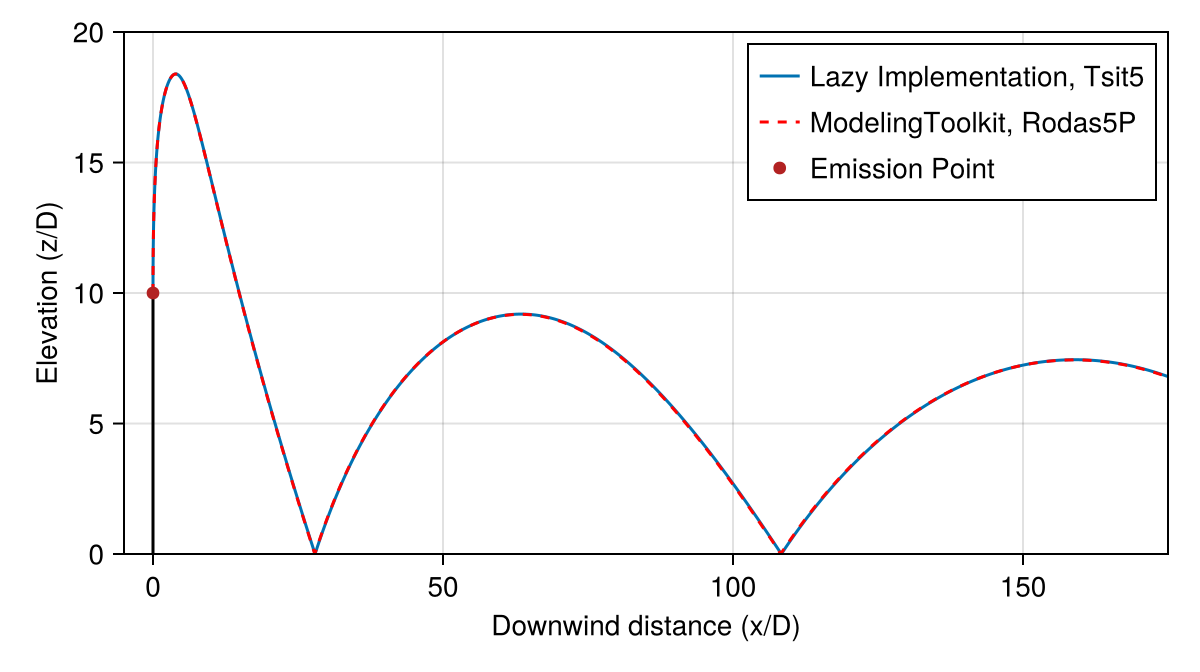

In [90]:
#| echo: false
#| label: fig-dense-1
#| fig-cap: "The plume height as a function of downwind distance, vent gas eleven times denser than ambient air."
f4 = Figure(figurepadding=0)
ax4 = Axis(f4[1, 1],
    xlabel = "Downwind distance (x/D)",
    ylabel = "Elevation (z/D)",
    limits = ((-5,175),(0,20)),
    aspect = AxisAspect(2)
)
plot!(ax4, dense_sol, idxs=(6, 7), label="Lazy Implementation, Tsit5")
plot!(ax4, dense_sol_mtk, idxs=(x,z), color=:red, linestyle=:dash, label="ModelingToolkit, Rodas5P")
lines!(ax4, [0, 0], [0, h/D], color=:black, label=nothing)
scatter!(ax4, [0], [h/D], color=:firebrick, label="Emission Point")
axislegend(position=:rt)
rowsize!(f4.layout,1,Aspect(1, 0.5))
resize_to_layout!(f4)
f4

I make no claims that this is a reasonable thing for the plume to do. It is mostly just for fun. If the `reflect` callback was changed to `terminate!`, then the plume would halt when the center line impacted the ground. There is also a case to be made that once the plume boundary impacts the ground, $z - \sqrt{2}b \sin \theta = 0$, then the integration should terminate and another model used. This is basically what DEGADIS does, once the plume is at ground level it transitions to another model for grounded plumes.

## Validating the Model

It is all fine and good to say "well, those look like plausible curves," I would like to have some validation that this is actually working as intended. For some confirmation I pulled data points from figure 3 in Ooms[@ooms-1972 page 907] using a graph digitizer. I chose that figure since covers most of the range of the z-axis. The other two figures are squashed down, making it difficult to get good resolution on the data points.

Unfortunately while Ooms provides *most* of the dimensionless groups needed to generate the plots, it is missing two important ones:

1. The initial plume dimension $\bar{b}_{0}$
2. The length of the zone of flow establishment *&delta;*

The actual dimensions and starting location of the plume will depend on how the zone of flow establishment is calculated, and those details are missing from the paper. I assumed the initial plume dimension $\bar{b}_{0} = \frac{1}{2\sqrt{2}}$, which corresponds to the plume starting with an identical width to the jet. Further I just picked a flow establishment of ~6.5 diameters, which is reasonable for a free jet. This recreates the curve really well.

Putting aside basically guessing the length of the zone of flow establishment, which feels pretty sketchy, that the curve has the correct shape and reproduces figure 3 in the paper is decent validation. Adjusting the initial height simply translates the curve up and down, it doesn't impact the result otherwise.

In [65]:
#| output: false
#              x/D     z/D
lfn_data = [ 16.628  19.953;
             43.054  29.86;
             46.366  32.233;
             61.684  36.698;
             84.591  42.558;
             109.085 48.977]

6×2 Matrix{Float64}:
  16.628  19.953
  43.054  29.86
  46.366  32.233
  61.684  36.698
  84.591  42.558
 109.085  48.977

In [70]:
#| output: false
lfn_prms = (M = zeros(7,7),
	        f = zeros(7),
		    rhoa_bar = (z) -> 1.0,
		    g_bar = (z) -> 4.278,
		    uprime_bar = (b,z) -> 0.0)

(M = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], f = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], rhoa_bar = var"#74#77"(), g_bar = var"#75#78"(), uprime_bar = var"#76#79"())

In [67]:
#| output: false
# initial values
lfn_state0 = [ 1.0       ,# c
	           1/(2√(2)) ,# b
	           8.0       ,# u
	           π/2       ,# θ
               -0.148    ,# ρ
	           0.0       ,# x
               6.5       ]# z

7-element Vector{Float64}:
  1.0
  0.35355339059327373
  8.0
  1.5707963267948966
 -0.148
  0.0
  6.5

In [72]:
#| output: false
lfn_prob = ODEProblem(ode_rhs!, lfn_state0, (0.0,150.0), lfn_prms)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 150.0)
u0: 7-element Vector{Float64}:
  1.0
  0.35355339059327373
  8.0
  1.5707963267948966
 -0.148
  0.0
  6.5

In [73]:
#| output: false
lfn_sol = solve(lfn_prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 24-element Vector{Float64}:
   0.0
   0.0464350030936994
   0.19238761609173477
   0.42785983997730237
   0.7576462799902453
   1.2208720936659723
   1.8451536764090841
   2.6765058607768504
   3.749038588606546
   5.116411237167668
   6.901776839897073
   9.243249545864048
  12.047060144290695
  15.521388266583642
  19.81202146353578
  25.179104474118798
  31.877710456540306
  40.26594288545354
  50.7560156600037
  63.88342958244503
  80.30150059999198
 100.8392398892424
 126.52870037151641
 150.0
u: 24-element Vector{Vector{Float64}}:
 [1.0, 0.35355339059327373, 8.0, 1.5707963267948966, -0.148, 0.0, 6.5]
 [0.9832543043292674, 0.35972047692240655, 7.8489705692426615, 1.5650900134609018, -0.1455216370407316, 0.00013236505860570854, 6.5464347514360925]
 [0.9337461406226379, 0.37911794324076875, 7.4064661136909065, 1.5469506348020015, -0.13819442881215047, 0.002285099167059863, 6.692369486442112]
 [0.8624770885

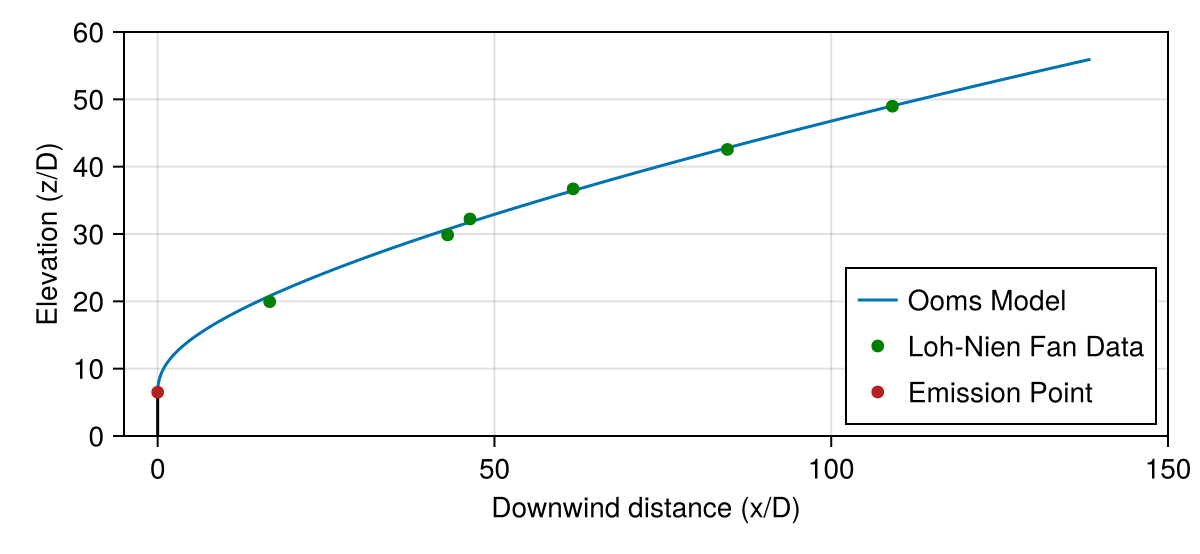

In [81]:
#| echo: false
#| label: fig-ooms-fig-3
#| fig-cap: "A recreation of figure 3 from Ooms."
f8 = Figure(figurepadding=0)
ax8 = Axis(f8[1, 1],
    xlabel = "Downwind distance (x/D)",
    ylabel = "Elevation (z/D)",
    limits = ((-5,150),(0,60)),
    aspect = DataAspect()
)
plot!(ax8, lfn_sol, idxs=(6, 7), label="Ooms Model")
scatter!(ax8, lfn_data[:,1], lfn_data[:,2], color=:green, label="Loh-Nien Fan Data")
lines!(ax8, [0, 0], [0, 6.5], color=:black, label=nothing)
scatter!(ax8, [0], [6.5], color=:firebrick, label="Emission Point")
axislegend(position=:rb)
rowsize!(f8.layout,1,Aspect(1, 60/155))
resize_to_layout!(f8)
f8

This actually relates to one of the main difficulties in finding test data to compare against, to validate that my code is working. Results from the first version of DEGADIS are not directly applicable as DEGADIS initializes a jet using a different algorithm and the inputs into the Ooms model are not the jet parameters passed to DEGADIS. That's assuming that I could even find DEGADIS results where the plume had the same molar weight and heat capacity as air, at which point the DEGADIS model reduces down to the original Ooms model. It has a different energy balance and for all other situations would be expected to generate different results.

That I can recreate the figures from the original paper and that the first 4 balance equations given here are equivalent to what is given in the DEGADIS documentation (once rendered dimensionless and with the corresponding constants substituted), and the 5th equation matches in the special case of the vent gas being air and the atmosphere having no density gradient (the right hand side of the equation is zero) leaves me pretty confident that my result is correct. I also have the advantage of being able to cross-check my integrals and all those derivatives using a CAS. But it would be more satisfying if I had some unambiguous test cases to reproduce.

## Future Opportunities

I only implemented the first version of the Ooms model. There are two subsequent papers that make modifications which may be worth implementing. The first significant modification is a more complex energy balance, which is the basis for the DEGADIS implementation of Ooms, in this case the molar weight and heat capacity of the plume are calculated from the concentration in the plume. This makes the integral vastly more complex and it might make sense to try this model out while numerically integrating the balance at each step. The second significant modification is a change to the plume *shape*. The Ooms model assumes the plume has a circular cross-section, which is known to be incorrect for plumes dispersing in the atmosphere. The plume can be modified to an elliptical cross section in such a way as to preserve the cross-sectional area while better matching the observed shapes of real plumes. I did not implement either of these mostly because I wanted the "minimal viable plume model" first. This can be a known-working starting point on top of which these modifications can be made.

Another obvious modification is to add ground-reflection. Once the plume has been solved, and there is a way to calculate concentrations at arbitrary points, it is not a huge challenge to add in ground-reflection. That is, managing the situation once the plume disperses into the ground. For conventional Gaussian plumes the typical assumption is that the plume simply reflects off and the concentration in this zone is the sum of the normal plume concentration and the concentration of reflected plume. Something similar could be done for Ooms as well.

## References
::: {#refs}
:::